# Predicting the Rising Cases and exploring Effect of Lockdown on the Rising Cases of CoVid in India

#### Hello!! Welcome to my Project. The main idea behind this project is to do a Co-Vid Analysis on a specific country which is India. Here I will be showing various kind of analysis based on the datasets acquired from Kaggle. I will try to fit linear and polynomial regression and predict rising cases for the dates to come. I'll also try to address this hypothesis which I want to test that the "Lockdown period in India didn't help the states to curb the number of rising cases". I'll also track rate of Unemployment during that time. I will also be showing other useful analytics on the vaccine administration and the overall handling of this situation by the Indian Government.

#### I would like to state, that I first uploaded the datasets in ECON323_2021_Fall/problem_sets/ folder and then tried reading those in the current Jupyter notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import datetime as dt
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import scipy.stats as stats
import scipy
from scipy.stats import ttest_ind
import geopandas as gpd
!pip install wordcloud
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#Here is what the first dataset looks like
covid_df = pd.read_csv('covid_19_india.csv')
covid_df

Sno        Date     Time State/UnionTerritory  \
0          1  2020-01-30  6:00 PM               Kerala   
1          2  2020-01-31  6:00 PM               Kerala   
2          3  2020-02-01  6:00 PM               Kerala   
3          4  2020-02-02  6:00 PM               Kerala   
4          5  2020-02-03  6:00 PM               Kerala   
...      ...         ...      ...                  ...   
18039  18106  2021-08-11  8:00 AM            Telangana   
18040  18107  2021-08-11  8:00 AM              Tripura   
18041  18108  2021-08-11  8:00 AM          Uttarakhand   
18042  18109  2021-08-11  8:00 AM        Uttar Pradesh   
18043  18110  2021-08-11  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational    Cured  Deaths  \
0                           1                        0        0       0   
1                           1                        0        0       0   
2                           2                        0        0       0   
3                           3                        0        0       0   
4                           3                        0        0       0   
...                       ...                      ...      ...     ...   
18039                       -                        -   638410    3831   
18040                       -                        -    77811     773   
18041                       -                        -   334650    7368   
18042                       -                        -  1685492   22775   
18043                       -                        -  1506532   18252   

       Confirmed  
0              1  
1              1  
2              2  
3              3  
4              3  
...          ...  
18039     650353  
18040      80660  
18041     342462  
18042    1708812  
18043    1534999  

[18044 rows x 9 columns]

### India has 29 States and 7 Union Territories so in total 36 States.

In [3]:
#Didn't need the serial no as we have index and neither Time is required
covid_df= covid_df.drop(["Sno", "Time"], axis=1)
covid_df

Date State/UnionTerritory ConfirmedIndianNational  \
0      2020-01-30               Kerala                       1   
1      2020-01-31               Kerala                       1   
2      2020-02-01               Kerala                       2   
3      2020-02-02               Kerala                       3   
4      2020-02-03               Kerala                       3   
...           ...                  ...                     ...   
18039  2021-08-11            Telangana                       -   
18040  2021-08-11              Tripura                       -   
18041  2021-08-11          Uttarakhand                       -   
18042  2021-08-11        Uttar Pradesh                       -   
18043  2021-08-11          West Bengal                       -   

      ConfirmedForeignNational    Cured  Deaths  Confirmed  
0                            0        0       0          1  
1                            0        0       0          1  
2                            0        0       0          2  
3                            0        0       0          3  
4                            0        0       0          3  
...                        ...      ...     ...        ...  
18039                        -   638410    3831     650353  
18040                        -    77811     773      80660  
18041                        -   334650    7368     342462  
18042                        -  1685492   22775    1708812  
18043                        -  1506532   18252    1534999  

[18044 rows x 7 columns]

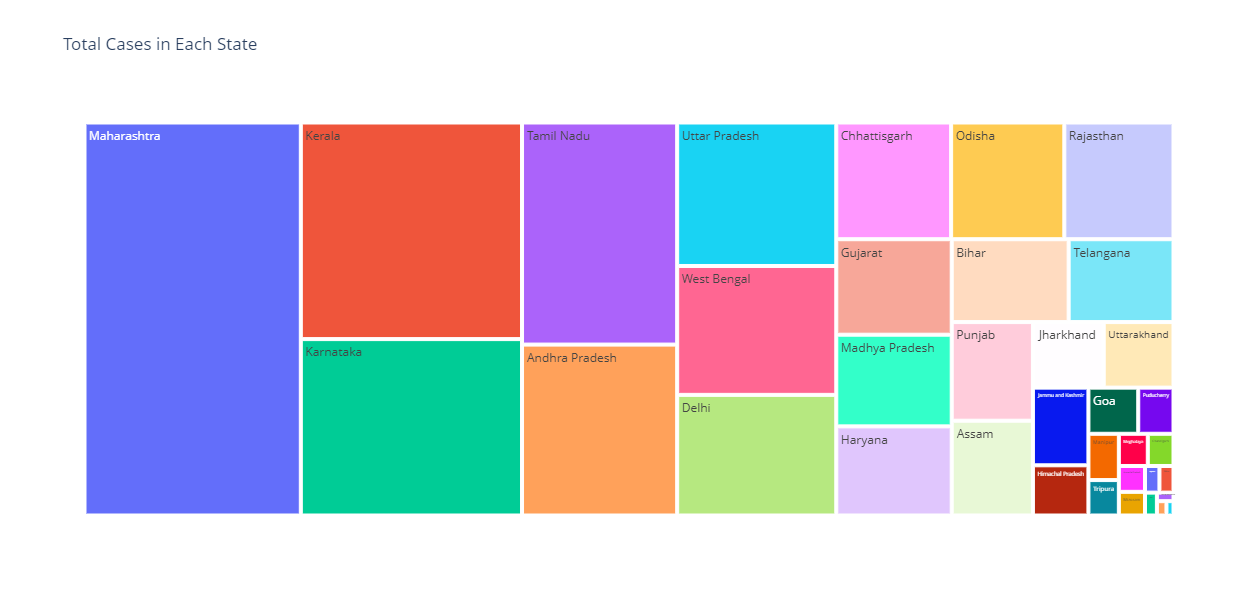

In [4]:
a=covid_df.groupby("State/UnionTerritory")["Confirmed"].max().reset_index()
px.treemap(a,path=["State/UnionTerritory"], values="Confirmed", title="Total Cases in Each State", width= 1300, height=600)

#### Maharashtra is the richest state in India. Mumbai which is the financial capital of India is in Maharashtra. A lot of the cases were in Mumbai which is why Maharashtra has the highest number of cases. Following Maharashtra is Kerala, Karnataka and tile goes on from left to right indicating from the highest to the lowest.

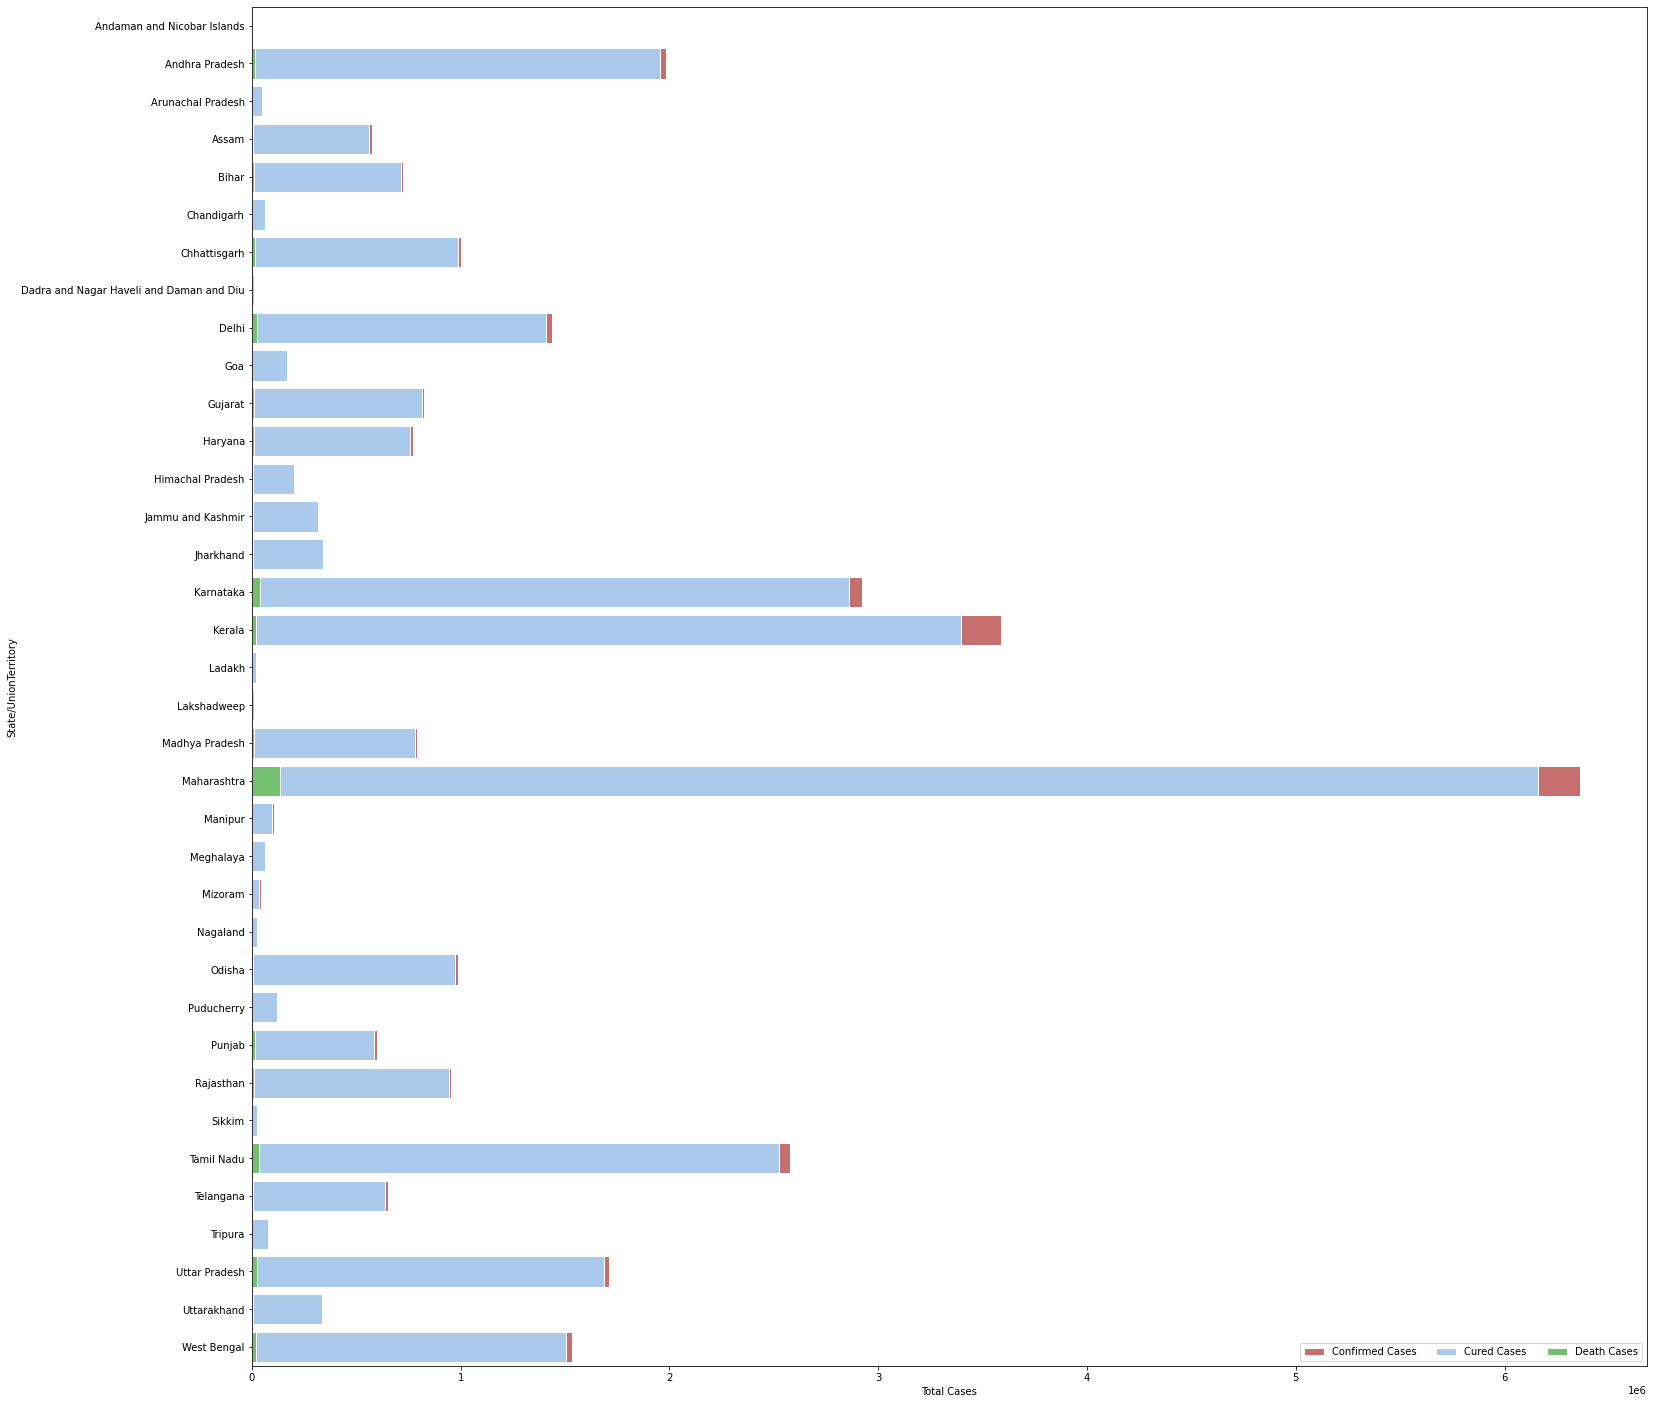

In [5]:
b=covid_df.groupby("State/UnionTerritory")[["Confirmed", "Cured", "Deaths"]].max().reset_index()
fig, ax = plt.subplots(figsize= (25,25))
sns.set_color_codes('muted')
sns.barplot(data=b,x="Confirmed", y="State/UnionTerritory", label = 'Confirmed Cases', color = 'r', edgecolor = 'w')
sns.set_color_codes('pastel')
sns.barplot(data=b,x="Cured", y="State/UnionTerritory", label = 'Cured Cases', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(data=b,x="Deaths", y="State/UnionTerritory", label = 'Death Cases', color = 'g', edgecolor = 'w')
ax.legend(ncol = 3, loc = 'lower right')
ax.set(xlabel="Total Cases")
plt.show()

#### I plot a barplot for each state showing the total confirmed cases, the recovery cases and the number of deaths. Seeing the visualization, it shows that the number of recovery cases are very high and the number of deaths is very low. We can make some conclusion based on this but however we cannot be sure. This suggests that the virus isn't that dangerous as majority of the people are recovering from it [we do not know people of what age are recovering and who are dying]. This visualization proves again that Maharashtra has the most number of cases, cured and people dying followed by Kerala and other states.

#### It is always good to know how many active cases were there when the data was being collected. Because this dataset does not have any active cases column, I will make one. Then I will show it on a piechart.

In [6]:
covid_df["Active"]= covid_df["Confirmed"]-covid_df["Cured"]-covid_df["Deaths"]
covid_df

Date State/UnionTerritory ConfirmedIndianNational  \
0      2020-01-30               Kerala                       1   
1      2020-01-31               Kerala                       1   
2      2020-02-01               Kerala                       2   
3      2020-02-02               Kerala                       3   
4      2020-02-03               Kerala                       3   
...           ...                  ...                     ...   
18039  2021-08-11            Telangana                       -   
18040  2021-08-11              Tripura                       -   
18041  2021-08-11          Uttarakhand                       -   
18042  2021-08-11        Uttar Pradesh                       -   
18043  2021-08-11          West Bengal                       -   

      ConfirmedForeignNational    Cured  Deaths  Confirmed  Active  
0                            0        0       0          1       1  
1                            0        0       0          1       1  
2                            0        0       0          2       2  
3                            0        0       0          3       3  
4                            0        0       0          3       3  
...                        ...      ...     ...        ...     ...  
18039                        -   638410    3831     650353    8112  
18040                        -    77811     773      80660    2076  
18041                        -   334650    7368     342462     444  
18042                        -  1685492   22775    1708812     545  
18043                        -  1506532   18252    1534999   10215  

[18044 rows x 8 columns]

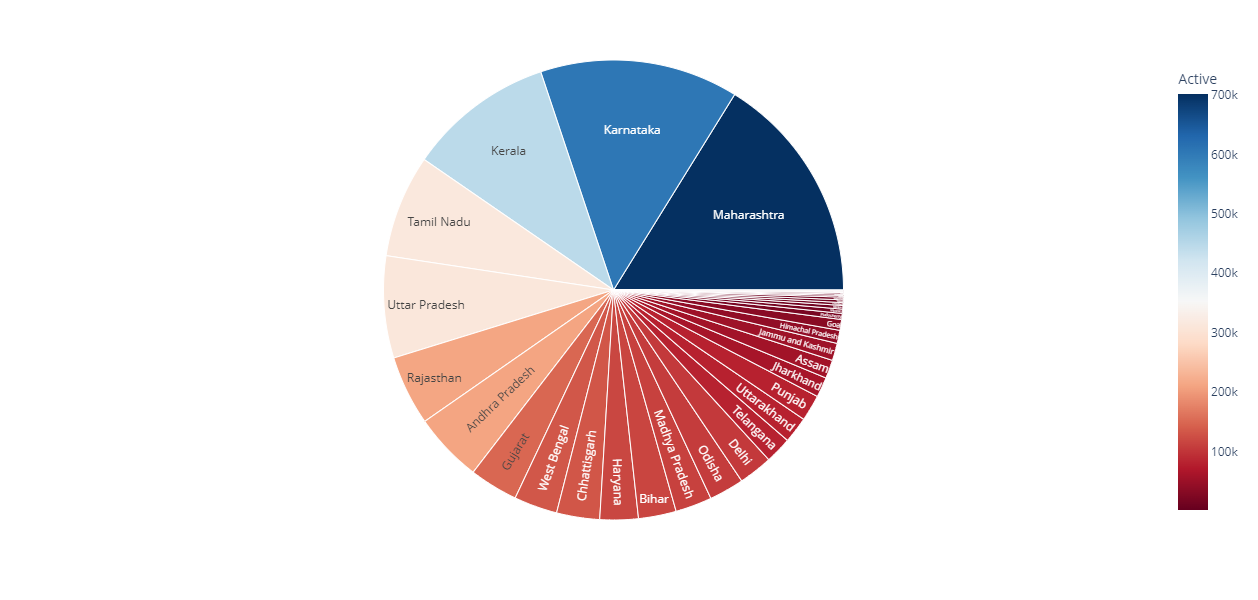

In [7]:
c=covid_df.groupby("State/UnionTerritory")[["Confirmed", "Cured", "Deaths", "Active"]].max().reset_index()
px.sunburst(c, path=['State/UnionTerritory'], values='Active', color='Active', hover_data=['Confirmed','Cured','Deaths'], color_continuous_scale='RdBu', width=1000, 
            height=600)

#### This pie-chart is such that it shows the "Active" cases for each state. More active cases a state has, more proportion it'll occupy. When one hovers over that state, it'll also show the Total Confirmed Cases, Total Deaths and Total Cured. Maharashtra has the most number of active cases followed by Karnataka and Kerala. If one hovers, then one will see Total Confirmed Cases for Kerala is higher than Karnataka but this pie-chart bases the analysis on the number of Active Covid cases.

In [8]:
a1=covid_df.groupby("State/UnionTerritory")["Confirmed"].max()
#Here I would like to justify the cases in terms of High, Medium & Low.
# 0-100000  -> Low
# 100001-1000000  -> Medium
# 1000001 or more  -> High

def high_or_low(s):
    if s > 1000001:
        out = "High"
    elif s>100001 and s<=1000000:
        out = "Medium"
    else:
        out = "Low"
    return out

case_bins= a1.apply(high_or_low)
case_bins

State/UnionTerritory
Andaman and Nicobar Islands                    Low
Andhra Pradesh                                High
Arunachal Pradesh                              Low
Assam                                       Medium
Bihar                                       Medium
Chandigarh                                     Low
Chhattisgarh                                  High
Dadra and Nagar Haveli and Daman and Diu       Low
Delhi                                         High
Goa                                         Medium
Gujarat                                     Medium
Haryana                                     Medium
Himachal Pradesh                            Medium
Jammu and Kashmir                           Medium
Jharkhand                                   Medium
Karnataka                                     High
Kerala                                        High
Ladakh                                         Low
Lakshadweep                                    Low
Madhya Pra

#### Above I've justified the cases in terms of High, Medium & Low for each state and printed if the respective state has High, Medium or Low cases. Maharashtra without any doubt has a score of High as it has the highest number of cases.
#### 0-100000  -> Low
#### 100001-1000000  -> Medium
#### 1000001 or more  -> High

In [9]:
covid_df.describe()

Cured         Deaths     Confirmed         Active
count  1.804400e+04   18044.000000  1.804400e+04   18044.000000
mean   2.796556e+05    4067.224396  3.021122e+05   18389.389271
std    6.157836e+05   10936.272865  6.571040e+05   52986.927254
min    0.000000e+00       0.000000  0.000000e+00   -9368.000000
25%    3.392000e+03      34.750000  4.387500e+03     319.750000
50%    3.393050e+04     599.000000  4.033600e+04    2287.500000
75%    2.808580e+05    3670.000000  3.013075e+05   12522.500000
max    6.159676e+06  134201.000000  6.363442e+06  701614.000000

#### The table above gives the summary statistic for the columns that have quantitative data to get an idea of what the scenario is in India.

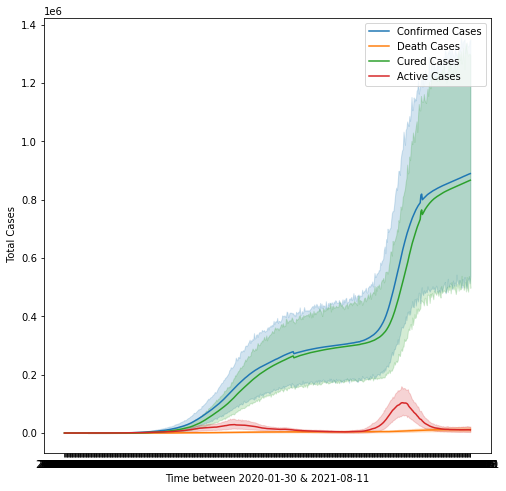

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(x=covid_df["Date"] , y=covid_df["Confirmed"], label = "Confirmed Cases", ax=ax)
sns.lineplot(x=covid_df["Date"] , y=covid_df["Deaths"], label = "Death Cases", ax=ax)
sns.lineplot(x=covid_df["Date"] , y=covid_df["Cured"], label = "Cured Cases", ax=ax)
sns.lineplot(x=covid_df["Date"] , y=covid_df["Active"], label = "Active Cases", ax=ax)
ax.set(xlabel="Time between 2020-01-30 & 2021-08-11", ylabel=" Total Cases")
plt.show()

#### Here, I'm plotting the time-trend of different kinds of cases for India. We see that number of deaths is almost negligible when compared to the rise in confirmed cases and recoveries. Because there are lots of dates, there's a black line because the dates have all clustered up which is why I had to add a different label specifying the time period.

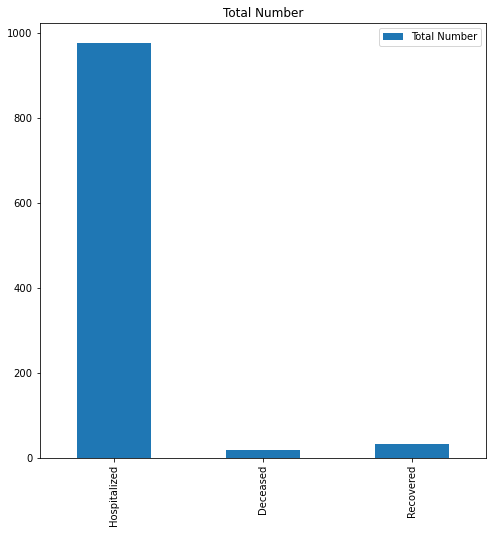

In [11]:
#Here is the second dataset
covid_data= pd.read_csv("data.csv")
a=b=c=0
for i in range(1025):
    if covid_data["current_status"][i]=="Hospitalized":
        a+=1
    elif covid_data["current_status"][i]=="Deceased":
        b+=1
    else:
        c+=1
pd.DataFrame([a,b,c], index=['Hospitalized', 'Deceased', 'Recovered'], columns=['Total Number']).plot(kind='bar', subplots=True, figsize=(8, 8))
plt.show()

#### This dataset contains information on a patient's status after getting the virus. The patient's age and also whether the patient is male. female or something else. Here I calculated how many patients have recovered, are hospitalized or deceased. I then plotted them on a barplot which can be seen above.

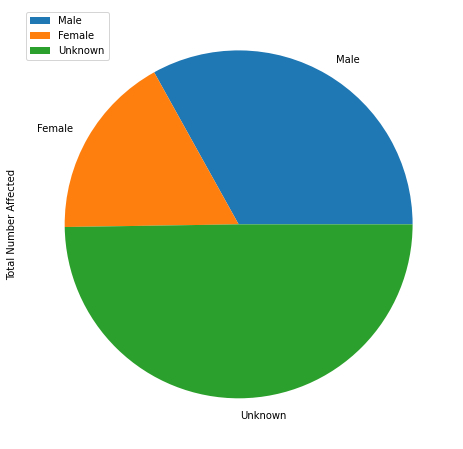

In [12]:
a=b=c=0
for i in range(1025):
    if covid_data["gender"][i]=="Male":
        a+=1
    elif covid_data["gender"][i]=="Female":
        b+=1
    else:
        c+=1
pd.DataFrame([a,b,c], index=['Male', 'Female', 'Unknown'], columns=['Total Number Affected']).plot(kind='pie', subplots=True, figsize=(8, 8))
plt.show()

#### Here I calculated how many patients are male, female or unknown. I glanced through the dataset and saw these inputs. I then plotted them on a piechart which can be seen above. Majority of the affected patient's gender is unknown while there are more males affected than females.

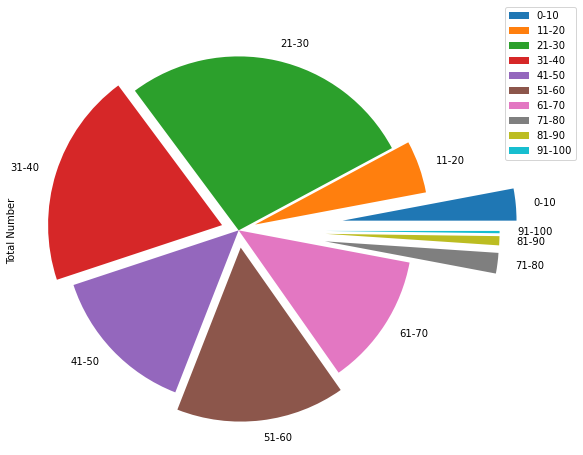

In [13]:
a=b=c=d=e=f=g=h=j=k=0
for i in range(1025):
    if 0<=covid_data["age"][i]<=10:
        a+=1
    elif 11<=covid_data["age"][i]<=20:
        b+=1
    elif 21<=covid_data["age"][i]<=30:
        c+=1
    elif 31<=covid_data["age"][i]<=40:
        d+=1
    elif 41<=covid_data["age"][i]<=50:
        e+=1
    elif 51<=covid_data["age"][i]<=60:
        f+=1
    elif 61<=covid_data["age"][i]<=70:
        g+=1
    elif 71<=covid_data["age"][i]<=80:
        h+=1
    elif 81<=covid_data["age"][i]<=90:
        j+=1
    elif 91<=covid_data["age"][i]<=100:
        k+=1
pd.DataFrame([a,b,c,d,e,f,g,h,j,k], index=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'], 
             columns=['Total Number']).plot(kind='pie', subplots=True, explode=(0.6, 0.1, 0, 0.1, 0, 0.1, 0, 0.5, 0.5, 0.5), figsize=(8, 8))
plt.legend(bbox_to_anchor=(1.1,1.025), loc="upper left")
plt.show()

#### Here I calculated how many patients are under what age brackets. I then plotted them on a piechart which can be seen above. A big chunk are patients in 21-30 age bracket followed by 31-40, 51-60 and so on.

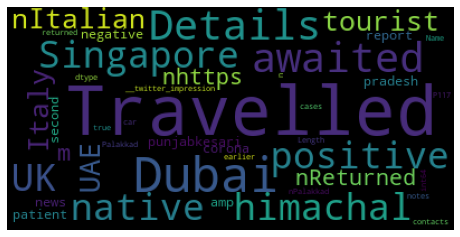

In [14]:
plt.subplots(figsize=(8,8))
text = covid_data['notes'].value_counts() 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### This is a WordCloud. It displays the words that has been used the most. Here I'm trying to find what note has been used most. It seems like people have "Travelled" a lot which is obviously the source of transmission. People have travelled to Dubai, tested positive, travelled to Singapore, UK, etc as these words can be seen more prominently.

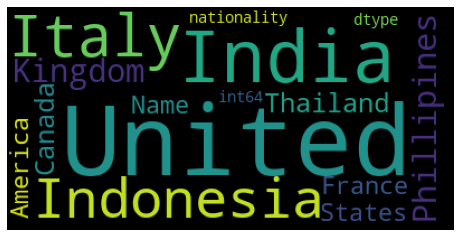

In [15]:
plt.subplots(figsize=(8,8))
text = covid_data['nationality'].value_counts()
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Here I'm trying to find what nationality is the person who's tested positive. It seems like there are Indians, Americans, British, Italians, etc as these words appear more prominently.

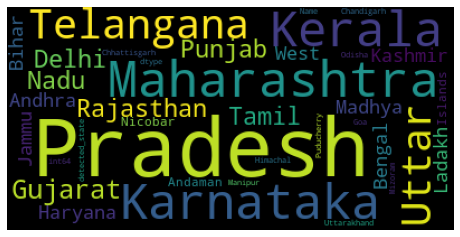

In [16]:
plt.subplots(figsize=(8,8))
text = covid_data['detected_state'].value_counts() 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Here I'm trying to find which is the state where the person has tested positive. It seems like Maharashtra, Uttar Pradesh, Tamil Nasu, etc are the ones as these words can be seen more prominently.

In [17]:
# Here is our third dataset
covid_test= pd.read_csv("StatewiseTestingDetails (1).csv")
covid_test['Negative'] = covid_test['Negative'].fillna(0)
covid_test.head()

Date                        State  TotalSamples Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands          1403     1210      12.0
1  2020-04-24  Andaman and Nicobar Islands          2679        0      27.0
2  2020-04-27  Andaman and Nicobar Islands          2848        0      33.0
3  2020-05-01  Andaman and Nicobar Islands          3754        0      33.0
4  2020-05-16  Andaman and Nicobar Islands          6677        0      33.0

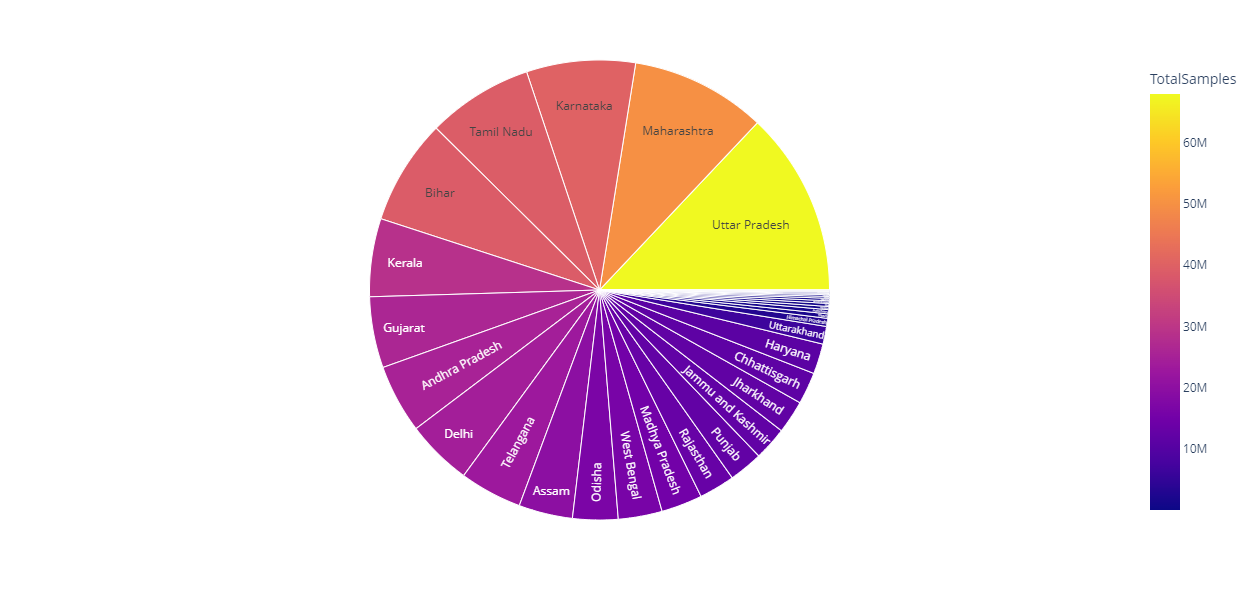

In [18]:
c1= covid_test.groupby("State")[["TotalSamples", "Positive"]].max().reset_index()
px.sunburst(c1, path=['State'], values='TotalSamples', color='TotalSamples', hover_data=['Positive'], width=1000, height=600)

#### This pie-chart is such that it shows the Total Samples collected by each state for testing. More samples collected by a state, more proportion it'll occupy. When one hovers over that state, it'll also show the Total Positive Cases out of the Total Samples collected. Maharashtra has the most number of Positive detected cases from those samples than Uttar Pradesh but this pie-chart bases the analysis on the number of Total Samples collected for testing. We see Uttar Pradesh has collected most number of samples followed by Maharashtra, Karnataka, etc. More information is seen when one hovers on the state.

In [19]:
covid_df1= covid_df.copy()
covid_df1["Date"]= pd.to_datetime(covid_df1["Date"])
covid_df1["Date"]= covid_df1["Date"].map(dt.datetime.toordinal)
sort= covid_df1.groupby("Date")["Confirmed"].sum().reset_index()
sort

Date  Confirmed
0    737454          1
1    737455          1
2    737456          2
3    737457          3
4    737458          3
..      ...        ...
555  738009   31895385
556  738010   31934455
557  738011   31969954
558  738012   31998158
559  738013   32036511

[560 rows x 2 columns]

#### Here, I'm converting dates which were of yyyy-mm-dd format to actual numbers for regression purposes and predicting future cases. I had to look online how this time-series prediction would work.

In [20]:
# Splitting the data into test and training datasets
x= sort["Date"]
y= sort["Confirmed"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4)
lr= LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

LinearRegression()

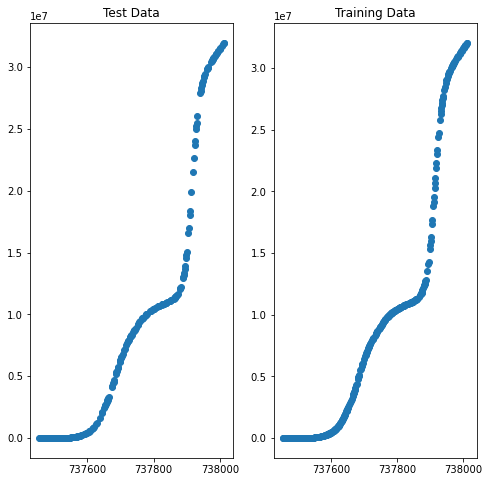

In [21]:
# Plotting the training and testing data to make sure if they're even 
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].scatter(x_test, y_test)
ax[0].set_title("Test Data")
ax[1].scatter(x_train, y_train)
ax[1].set_title("Training Data")
plt.show()

In [22]:
y_predict= lr.predict(np.array(x_test).reshape(-1,1))
mean_squared_error(x_test, y_predict)

173032191584767.3

#### Above, I tried finding the Mean Squared Error (M.S.E) for the data which is actually huge suggesting that the linear line is actually not the best model that fits the data.

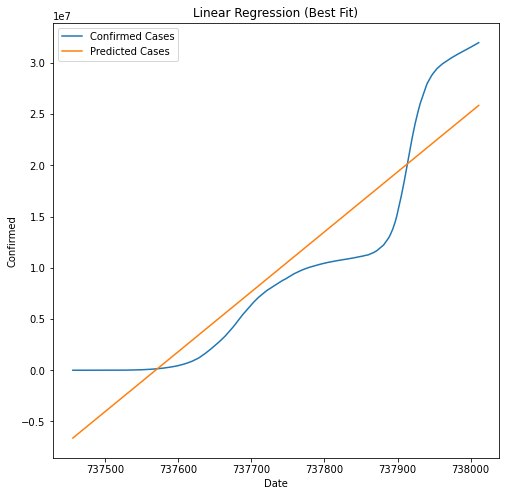

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(x=x_test , y=y_test, label = "Confirmed Cases", ax=ax)
sns.lineplot(x=x_test , y=y_predict.flatten(), label = "Predicted Cases", ax=ax)
ax.set_title("Linear Regression (Best Fit)")
plt.show()

#### Linear Line of Best Fit using Linear Regression. I adapted it from the lecture notes. 

In [24]:
lr.predict([[738009]])

array([[25729852.80361176]])

#### Using the model that I tried fitting in the data, I tried predicting the cases on "738009" which is a date. On the dataframe, cases for that date is 31895385 but our model predicts 25729852.8 which it underpredicted because it's not the best fit. It's not even close yet close enough when we look at the magnitude of the numbers.

In [25]:
sqft_lr_model = linear_model.LinearRegression()

# fit the model
sqft_lr_model.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))

# print the coefficients
beta_0 = sqft_lr_model.intercept_
beta_1 = sqft_lr_model.coef_[0]

print(f"Fit model: Confirmed Cases = {beta_0} + {beta_1}*Date")

Fit model: Confirmed Cases = [-4.27989692e+10] + [58027.32784435]*Date


#### Above is the equation of the predicted model.

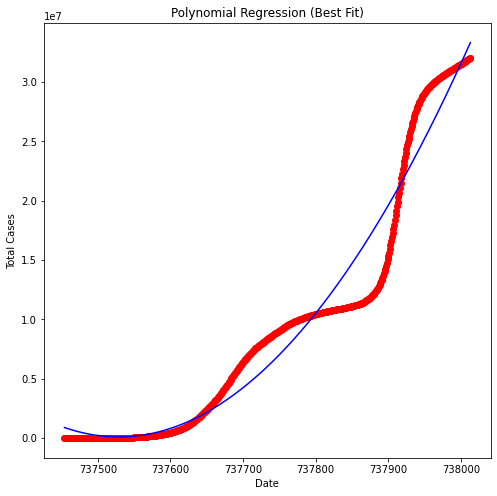

In [26]:
poly_reg = PolynomialFeatures(degree=5)
X = poly_reg.fit_transform(np.array(x).reshape(-1,1))
pol_reg = LinearRegression()
pol_reg.fit(X, y)

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x, y, color='red')
plt.plot(np.array(x).reshape(-1,1), pol_reg.predict(poly_reg.fit_transform(np.array(x).reshape(-1,1))), color='blue')
plt.title('Polynomial Regression (Best Fit)')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

#### I tried Polynomial Regression to fit the data. Looking at it, it does seem that the curve fits the data better than the Linear Model. I had to google to know how to fit it.

In [27]:
mean_squared_error(x, pol_reg.predict(poly_reg.fit_transform(np.array(x).reshape(-1,1))))

179924850444799.0

#### This Mean Squared Error is still huge but it's lower than the Linear Model we tried to fit so it's definitely a better fit than the previous one.

In [28]:
pol_reg.predict(poly_reg.fit_transform([[738009]]))

array([32782821.83300781])

#### This prediction is a lot closer to the actual data on the dataframe. The actual data is 31895385 but our model predicts 32782821.8 which is slight overprediction because it's not an accurate fit. However, it could be that the actual data point and the predicted one coincide at that point and then diverge later.

In [29]:
r2 = r2_score(np.array(y).reshape(-1,1), pol_reg.predict(poly_reg.fit_transform(np.array(x).reshape(-1,1))))
r2

0.9552811446782898

#### The R-Squared tells us how accurate our line of best fit is in the data. It lies between 0 and 1. The score is 0.95 which tells us that its a very good fit. But as economists, we should always think about other possibilities  and bias and not completely accept the results.

In [30]:
# Just listing all the states of India which will be used further in the analysis
f= covid_df1.groupby("State/UnionTerritory")[["Date", "Confirmed"]]
states= list(covid_df["State/UnionTerritory"].unique())
states

['Kerala',
 'Telangana',
 'Delhi',
 'Rajasthan',
 'Uttar Pradesh',
 'Haryana',
 'Ladakh',
 'Tamil Nadu',
 'Karnataka',
 'Maharashtra',
 'Punjab',
 'Jammu and Kashmir',
 'Andhra Pradesh',
 'Uttarakhand',
 'Odisha',
 'Puducherry',
 'West Bengal',
 'Chhattisgarh',
 'Chandigarh',
 'Gujarat',
 'Himachal Pradesh',
 'Madhya Pradesh',
 'Bihar',
 'Manipur',
 'Mizoram',
 'Andaman and Nicobar Islands',
 'Goa',
 'Assam',
 'Jharkhand',
 'Arunachal Pradesh',
 'Tripura',
 'Nagaland',
 'Meghalaya',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Sikkim',
 'Lakshadweep']

The Mean Squared Error (M.S.E) for Kerala is 849568396383.7281
The Mean Squared Error (M.S.E) for Telangana is 294032675894.6615
The Mean Squared Error (M.S.E) for Delhi is 267021338035.50003
The Mean Squared Error (M.S.E) for Rajasthan is 301171007013.904
The Mean Squared Error (M.S.E) for Uttar Pradesh is 310505155545.0976
The Mean Squared Error (M.S.E) for Haryana is 278876185236.6593
The Mean Squared Error (M.S.E) for Ladakh is 533113049311.72644
The Mean Squared Error (M.S.E) for Tamil Nadu is 494488682172.2395
The Mean Squared Error (M.S.E) for Karnataka is 717621870958.4086
The Mean Squared Error (M.S.E) for Maharashtra is 5960462151970.39
The Mean Squared Error (M.S.E) for Punjab is 329611165428.99243
The Mean Squared Error (M.S.E) for Jammu and Kashmir is 393145208645.4409
The Mean Squared Error (M.S.E) for Andhra Pradesh is 358147742942.87714
The Mean Squared Error (M.S.E) for Uttarakhand is 418961178240.0586
The Mean Squared Error (M.S.E) for Odisha is 269249167144.29962
The

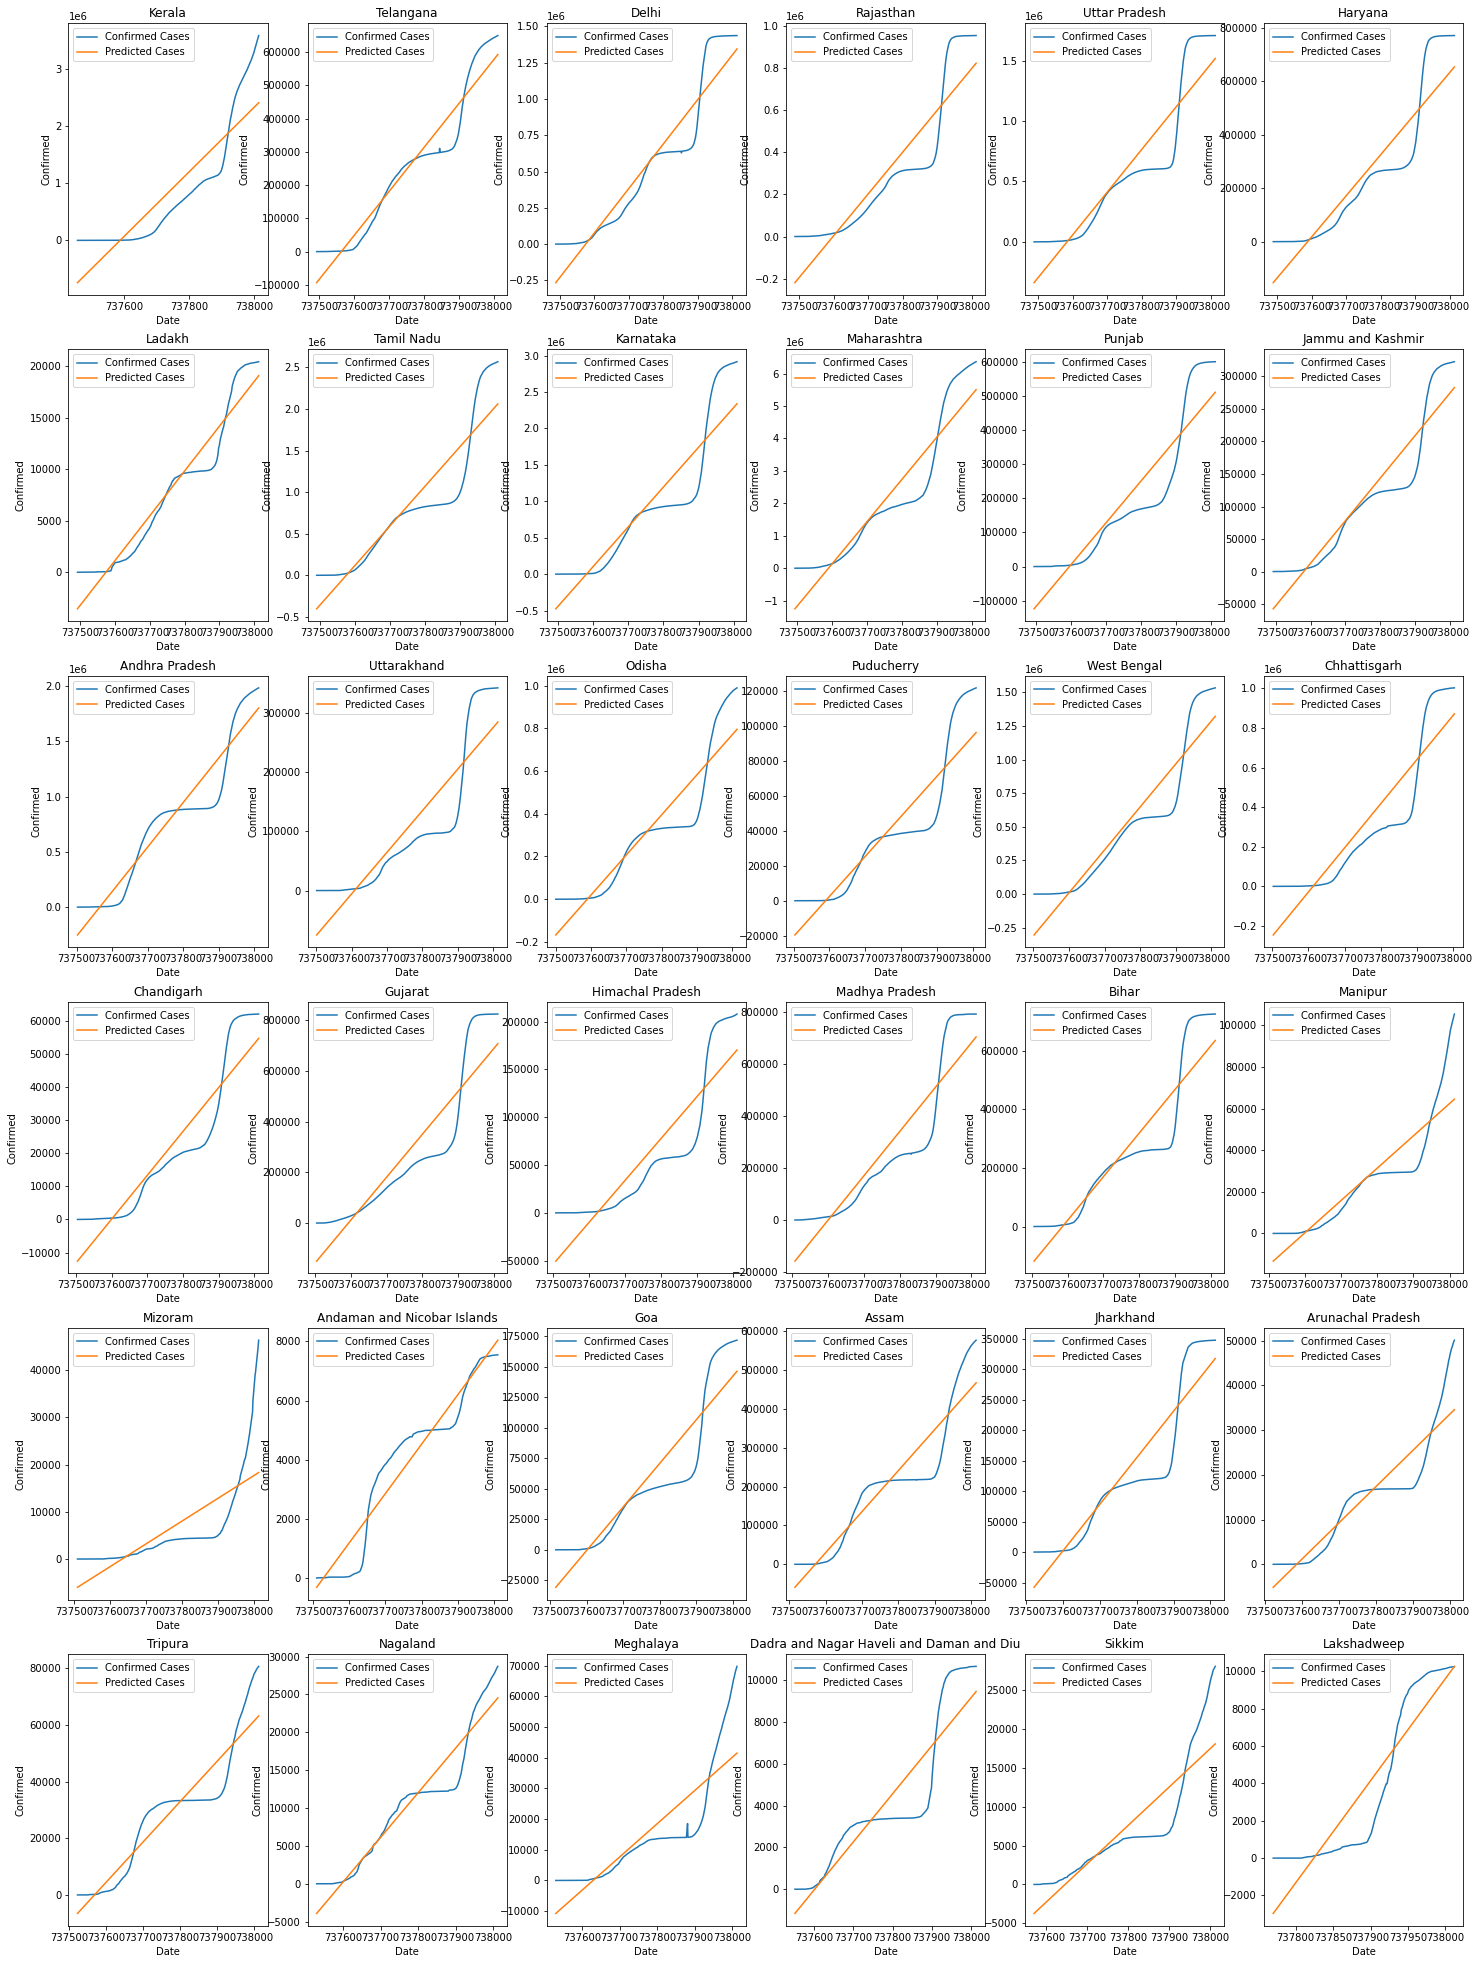

In [31]:
fig, ax = plt.subplots(6, 6, figsize=(25, 35))
a=b=0
for state in (states):
    x= f.get_group(state)["Date"]
    y= f.get_group(state)["Confirmed"]
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.45)
    lr= LinearRegression()
    lr.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
    y_predict= lr.predict(np.array(x_test).reshape(-1,1))
    sns.lineplot(x= x_test , y= y_test, label = "Confirmed Cases", ax= ax[a,b])
    sns.lineplot(x= x_test , y= y_predict.flatten(), label = "Predicted Cases", ax= ax[a,b])
    ax[a,b].set_title(state)
    b+=1
    if b==6:
        a+=1
        b=0   
    print("The Mean Squared Error (M.S.E) for",state, "is",mean_squared_error(x_test, y_predict))

#### Above, I've printed the Mean Squared Error (M.S.E) for each state after grouping them and their respective cases together. I tried to fit the Linear Model to each of the state. Each state's M.S.E is very big.

The R-Squared score for Kerala is 0.9710144933227723
The R-Squared score for Telangana is 0.9579535192108204
The R-Squared score for Delhi is 0.9556455140074434
The R-Squared score for Rajasthan is 0.9373423548485136
The R-Squared score for Uttar Pradesh is 0.9269562488149761
The R-Squared score for Haryana is 0.9425573363588413
The R-Squared score for Ladakh is 0.9704078117523293
The R-Squared score for Tamil Nadu is 0.9144376080640245
The R-Squared score for Karnataka is 0.9252019673919617
The R-Squared score for Maharashtra is 0.95820254885346
The R-Squared score for Punjab is 0.947005547447673
The R-Squared score for Jammu and Kashmir is 0.9453927455014884
The R-Squared score for Andhra Pradesh is 0.9243482236571061
The R-Squared score for Uttarakhand is 0.9230999762311314
The R-Squared score for Odisha is 0.9226300402207651
The R-Squared score for Puducherry is 0.9204063327354909
The R-Squared score for West Bengal is 0.9479538003586961
The R-Squared score for Chhattisgarh is 0.94

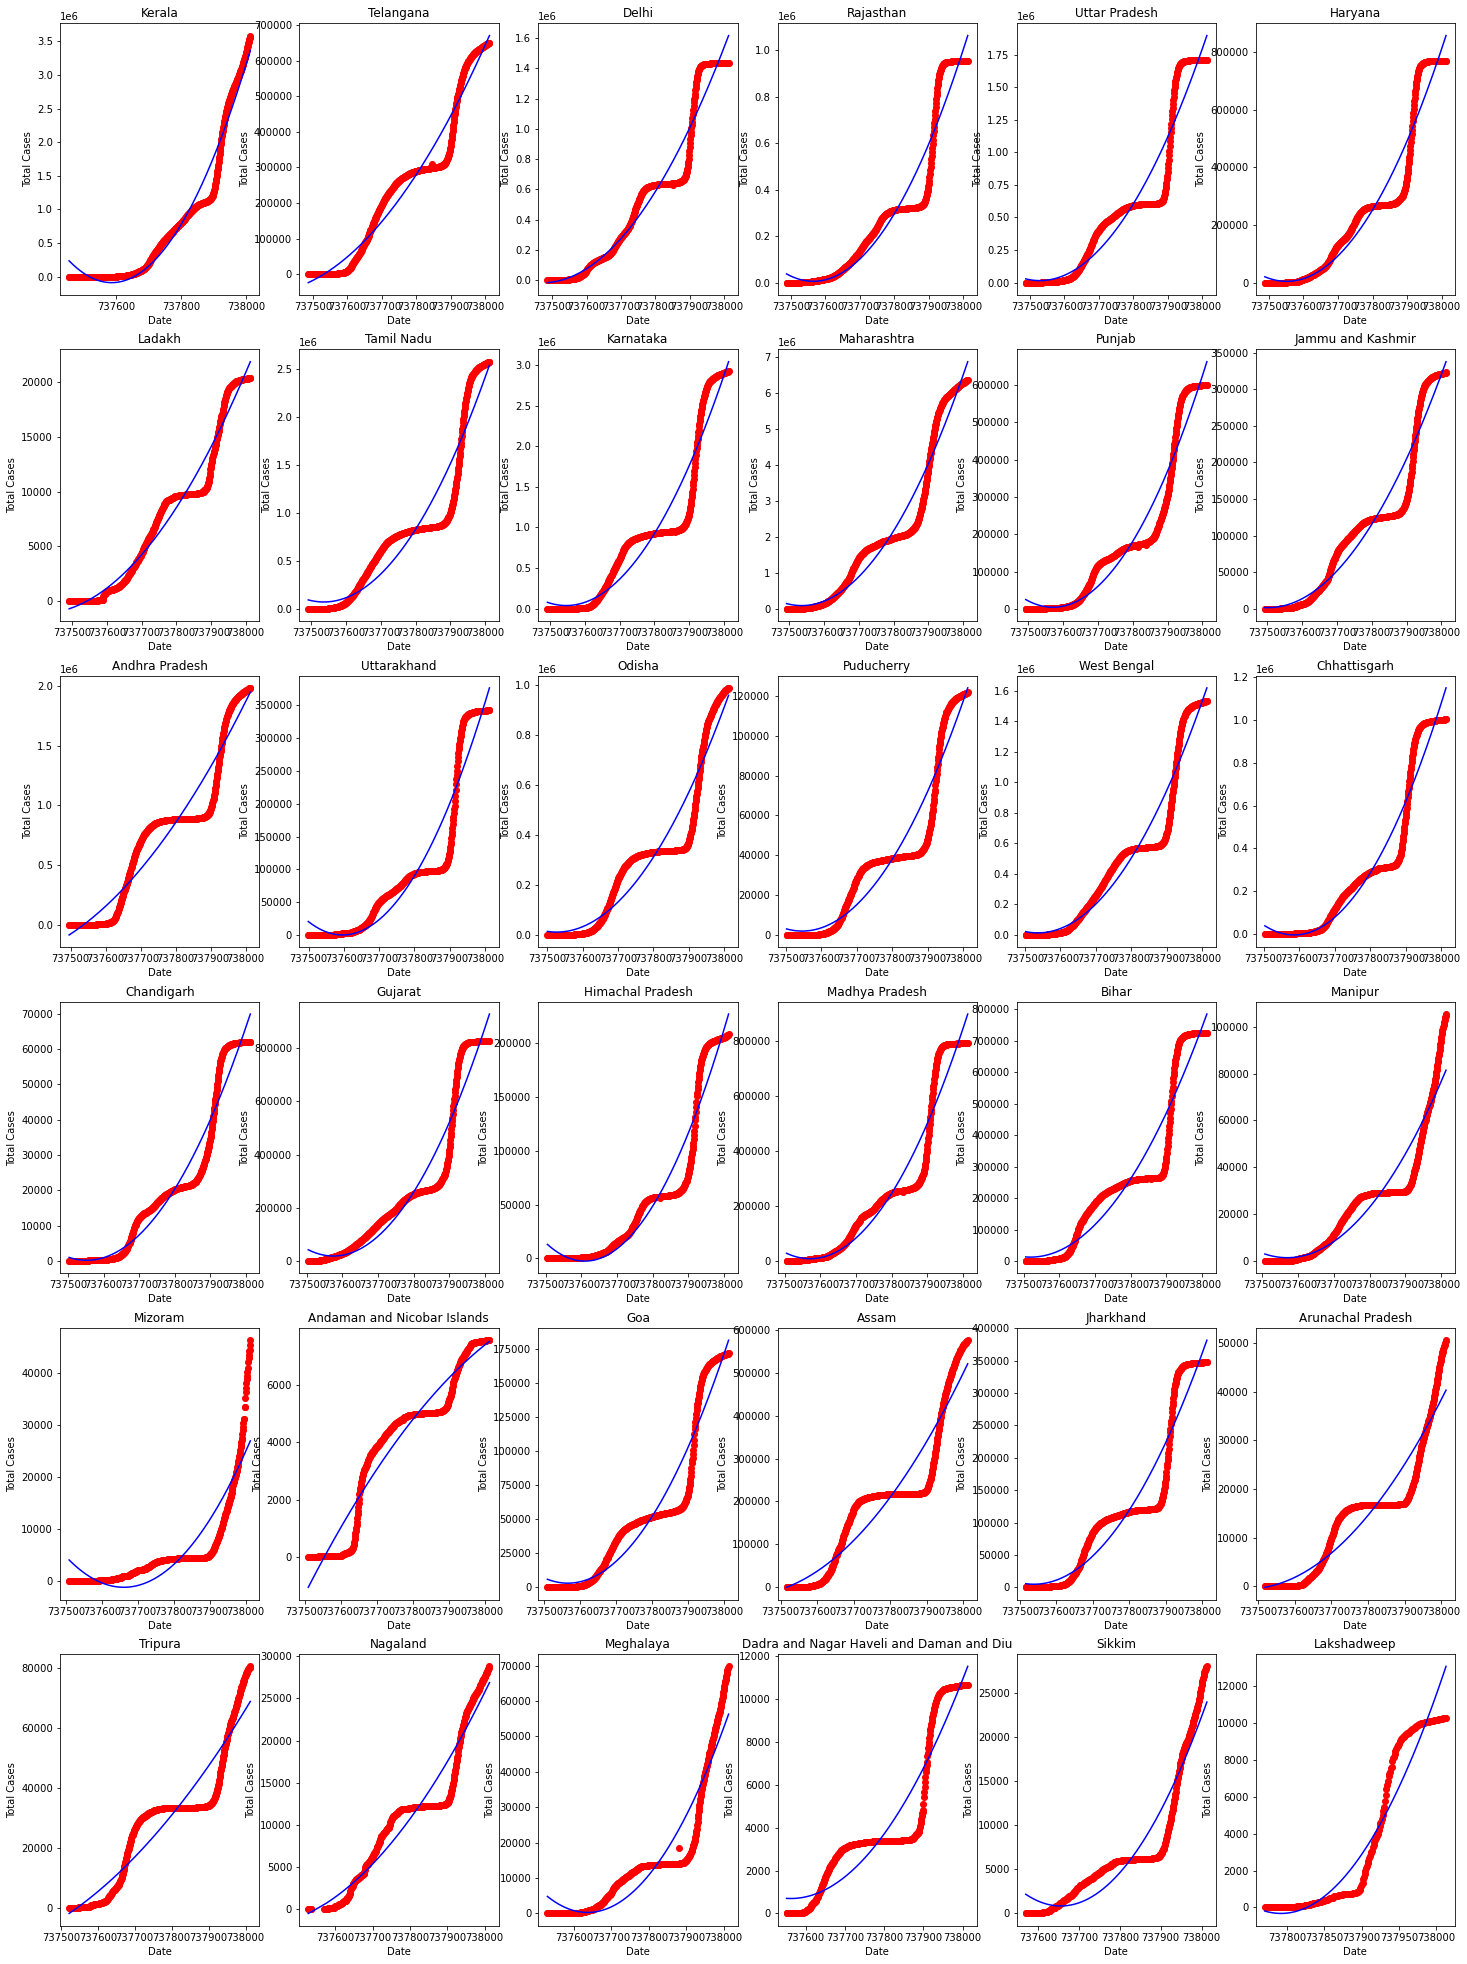

In [32]:
fig, ax = plt.subplots(6, 6, figsize=(25, 35))
a=b=0
for state in (states):
    x= f.get_group(state)["Date"]
    y= f.get_group(state)["Confirmed"]
    poly_reg = PolynomialFeatures(degree=5)
    X_poly = poly_reg.fit_transform(np.array(x).reshape(-1,1))
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    
    ax[a,b].scatter(x, y, color='red')
    ax[a,b].plot(np.array(x).reshape(-1,1), pol_reg.predict(poly_reg.fit_transform(np.array(x).reshape(-1,1))), color='blue')
    ax[a,b].set_title(state)
    ax[a,b].set_xlabel('Date')
    ax[a,b].set_ylabel('Total Cases')
    b+=1
    if b==6:
        a+=1
        b=0    
    print("The R-Squared score for",state, "is",r2_score(np.array(y).reshape(-1,1), pol_reg.predict(poly_reg.fit_transform(np.array(x).reshape(-1,1)))))

#### Above, I've printed the R-Squared for each state after grouping them and their respective cases together. I tried to fit the Polynomial Model to each of the state. Each state's R-Squared is very close to 1 barring a few states.

In [33]:
covid_df2= covid_df.copy()
a11= covid_df2.loc[318:1218, :]
a11

Date State/UnionTerritory ConfirmedIndianNational  \
318   2020-03-24         Chhattisgarh                       1   
319   2020-03-24                Delhi                      29   
320   2020-03-24              Gujarat                      32   
321   2020-03-24              Haryana                      14   
322   2020-03-24     Himachal Pradesh                       3   
...          ...                  ...                     ...   
1214  2020-04-22            Telangana                       -   
1215  2020-04-22              Tripura                       -   
1216  2020-04-22          Uttarakhand                       -   
1217  2020-04-22        Uttar Pradesh                       -   
1218  2020-04-22          West Bengal                       -   

     ConfirmedForeignNational  Cured  Deaths  Confirmed  Active  
318                         0      0       0          1       1  
319                         1      6       1         30      23  
320                         1      0       1         33      32  
321                        14     11       0         28      17  
322                         0      0       1          3       2  
...                       ...    ...     ...        ...     ...  
1214                        -    194      23        945     728  
1215                        -      1       0          2       1  
1216                        -     19       0         46      27  
1217                        -    165      21       1412    1226  
1218                        -     73      15        423     335  

[901 rows x 8 columns]

#### India announced its 1st lockdown period on 24 March, 2020. Above, I've made a table that has data for 30 days starting from 24 March 2020 to 22 April 2020. It has data on the cases recorded for each state. I'll be trying to see the average increase of cases in each state in these states and then compare the means between certain states by doing t-tests.

In [34]:
states= list((a11["State/UnionTerritory"].unique()))
test= a11.groupby("State/UnionTerritory")[["Confirmed", "Active"]]
for n, i in enumerate(states):
    if n==32:
        break
    x=np.random.choice(test.get_group(i)["Confirmed"], 10)
    y=np.random.choice(test.get_group(states[n+1])["Confirmed"], 10)
    print("T-Test values for",i,"and",states[n+1],"are",scipy.stats.ttest_ind(x, y))

T-Test values for Chhattisgarh and Delhi are Ttest_indResult(statistic=-3.2543453250421686, pvalue=0.004403053792510779)
T-Test values for Delhi and Gujarat are Ttest_indResult(statistic=0.3437644206573578, pvalue=0.7350064018461518)
T-Test values for Gujarat and Haryana are Ttest_indResult(statistic=1.3340281080334324, pvalue=0.19882860871723348)
T-Test values for Haryana and Himachal Pradesh are Ttest_indResult(statistic=4.539839006426491, pvalue=0.00025371207823005)
T-Test values for Himachal Pradesh and Karnataka are Ttest_indResult(statistic=-5.857043328006622, pvalue=1.5123249311210046e-05)
T-Test values for Karnataka and Kerala are Ttest_indResult(statistic=-1.2143052653454816, pvalue=0.24032261909461244)
T-Test values for Kerala and Madhya Pradesh are Ttest_indResult(statistic=-1.2876019505001746, pvalue=0.21419413459025727)
T-Test values for Madhya Pradesh and Maharashtra are Ttest_indResult(statistic=-1.4102511640545765, pvalue=0.17551251182993205)
T-Test values for Maharasht

#### Above, I ran the t-tests for different states ( not all as the output would have been very long). We get the t-statistic and the p-value. Most of the results can be rejected at 5% level as the |t-statistic| is greater than 2 and the p-value is also less than 0.05 except for a few states where it cannot be rejected like for Assam & Jharkhand, Delhi & Gujarat and a few more.

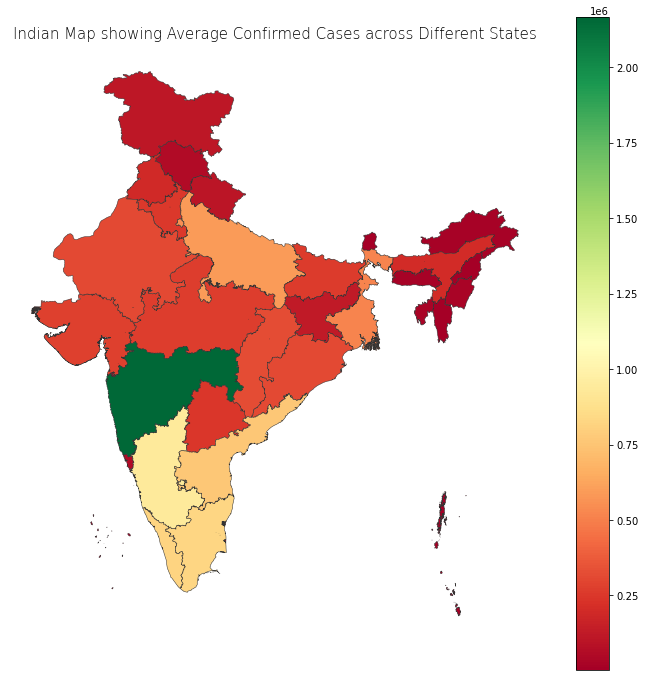

In [35]:
shp_gdf = gpd.read_file('Indian States/Indian_States.shp')
map1= covid_df.groupby("State/UnionTerritory")[["Confirmed", "Cured", "Deaths"]].mean().reset_index()
a= map1['State/UnionTerritory'].replace({'Andaman and Nicobar Islands': 'Andaman & Nicobar Island', 'Delhi': 'NCT of Delhi', "Jammu and Kashmir": "Jammu & Kashmir"})
b= shp_gdf['st_nm'].replace({'Dadara & Nagar Havelli': 'Dadra and Nagar Haveli and Daman and Diu', "Daman & Diu": "Ladakh", "Arunanchal Pradesh": "Arunachal Pradesh"})
map1["State"]= a
shp_gdf["State"]=b
shp_gdf1= shp_gdf.drop(["st_nm"], axis=1)
map11= map1.drop(["State/UnionTerritory"], axis=1)
merged= pd.merge(shp_gdf1, map11, on="State", how="left")

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Indian Map showing Average Confirmed Cases across Different States', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Confirmed', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

#### I plotted the Indian map showing average confirmed cases acroass different states. The legend makes it easy to understand that a state having more average number of cases has a greenish color whereas a state having less has a reddish color.

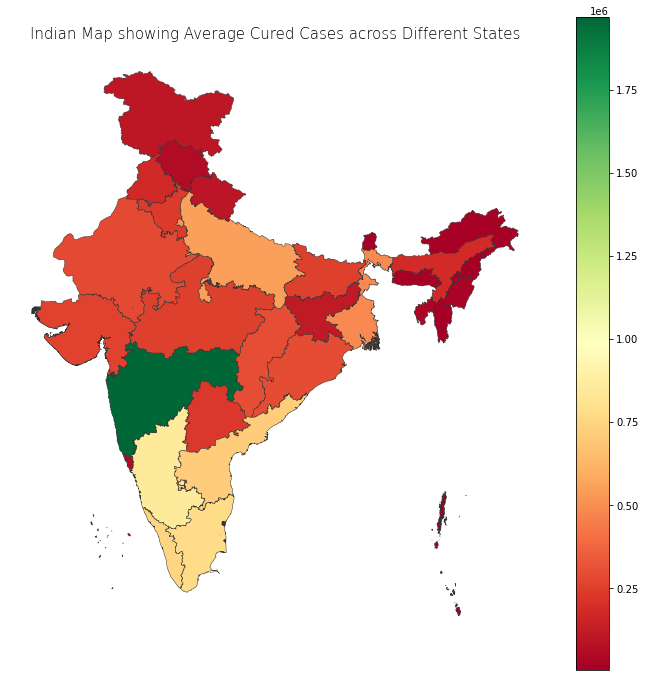

In [36]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Indian Map showing Average Cured Cases across Different States', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cured', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

#### I plotted the Indian map showing average cured cases acroass different states. The legend makes it easy to understand that a state having more average number of cured patients has a greenish color whereas a state having less has a reddish color.

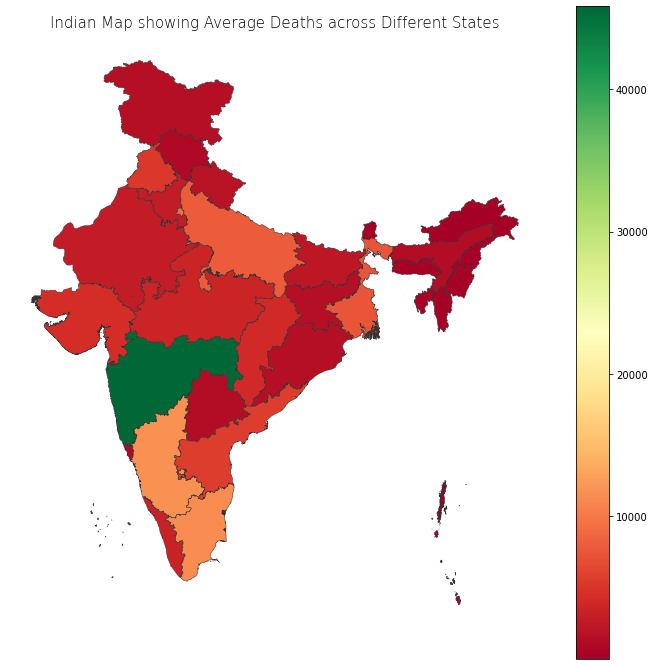

In [37]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Indian Map showing Average Deaths across Different States', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Deaths', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

#### I plotted the Indian map showing average deaths acroass different states. The legend makes it easy to understand that a state having more average number of deaths has a greenish color whereas a state having less has a reddish color.

In [38]:
# Here is our fourth dataset
covid_vaccine= pd.read_csv("covid_vaccine_statewise.csv")
covid_vaccine

Updated On        State  Total Doses Administered  Sessions   Sites   \
0     2021-01-16        India                   48276.0    3455.0   2957.0   
1     2021-01-17        India                   58604.0    8532.0   4954.0   
2     2021-01-18        India                   99449.0   13611.0   6583.0   
3     2021-01-19        India                  195525.0   17855.0   7951.0   
4     2021-01-20        India                  251280.0   25472.0  10504.0   
...          ...          ...                       ...       ...      ...   
7840  2021-08-11  West Bengal                       NaN       NaN      NaN   
7841  2021-08-12  West Bengal                       NaN       NaN      NaN   
7842  2021-08-13  West Bengal                       NaN       NaN      NaN   
7843  2021-08-14  West Bengal                       NaN       NaN      NaN   
7844  2021-08-15  West Bengal                       NaN       NaN      NaN   

      First Dose Administered  Second Dose Administered  \
0                     48276.0                       0.0   
1                     58604.0                       0.0   
2                     99449.0                       0.0   
3                    195525.0                       0.0   
4                    251280.0                       0.0   
...                       ...                       ...   
7840                      NaN                       NaN   
7841                      NaN                       NaN   
7842                      NaN                       NaN   
7843                      NaN                       NaN   
7844                      NaN                       NaN   

      Male (Doses Administered)  Female (Doses Administered)  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   
...                         ...                          ...   
7840                        NaN                          NaN   
7841                        NaN                          NaN   
7842                        NaN                          NaN   
7843                        NaN                          NaN   
7844                        NaN                          NaN   

      Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                                  NaN  ...                               NaN   
1                                  NaN  ...                               NaN   
2                                  NaN  ...                               NaN   
3                                  NaN  ...                               NaN   
4                                  NaN  ...                               NaN   
...                                ...  ...                               ...   
7840                               NaN  ...                               NaN   
7841                               NaN  ...                               NaN   
7842                               NaN  ...                               NaN   
7843                               NaN  ...                               NaN   
7844                               NaN  ...                               NaN   

      45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                                  NaN                             NaN   
1                                  NaN                             NaN   
2                                  NaN                             NaN   
3                                  NaN                             NaN   
4                                  NaN                             NaN   
...                                ...                             ...   
7840                               NaN                             NaN   
7841                      

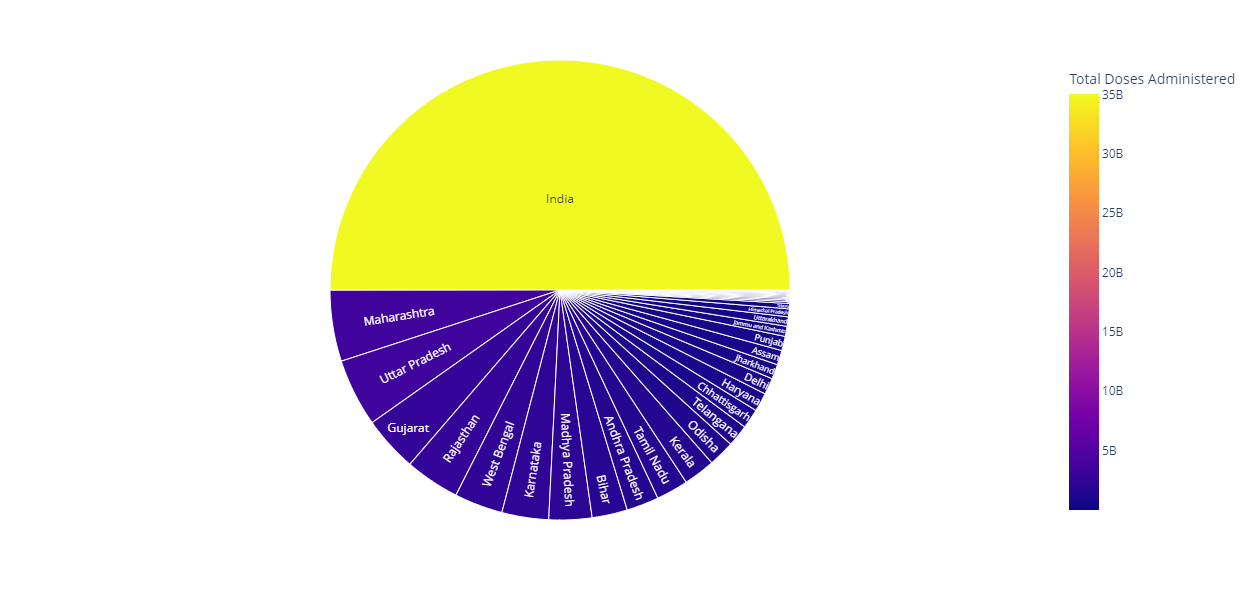

In [39]:
v= covid_vaccine.groupby("State")[["Total Doses Administered","First Dose Administered", "Second Dose Administered", "Male (Doses Administered)",
    "Female (Doses Administered)", " Covaxin (Doses Administered)", "CoviShield (Doses Administered)", "Sputnik V (Doses Administered)"]].sum().reset_index()
px.sunburst(v, path=['State'], values='Total Doses Administered', color='Total Doses Administered', hover_data=['First Dose Administered', "Second Dose Administered"], 
            width=1000, height=600)

#### This dataset has India (which is the country) also in the state column. Therefore it makes sense that India occupies half the pie-chart because the other states comprise to form India total. Here, I'm trying to show how many vaccine doses has each state administered. When one hovers over the state, it'll also show, out of the total does administered, how many are first doses and how many are second doses which have been administered. All the 36 states and Union Territories occupy half the pie-chart whereas India which is the country occupies the other half because the sum of all the doses administered makes up for the total doses that have been administered by India. We see that Maharashtra has administered the most vaccines followed by Uttar Pradesh, Gujarat and the other states.

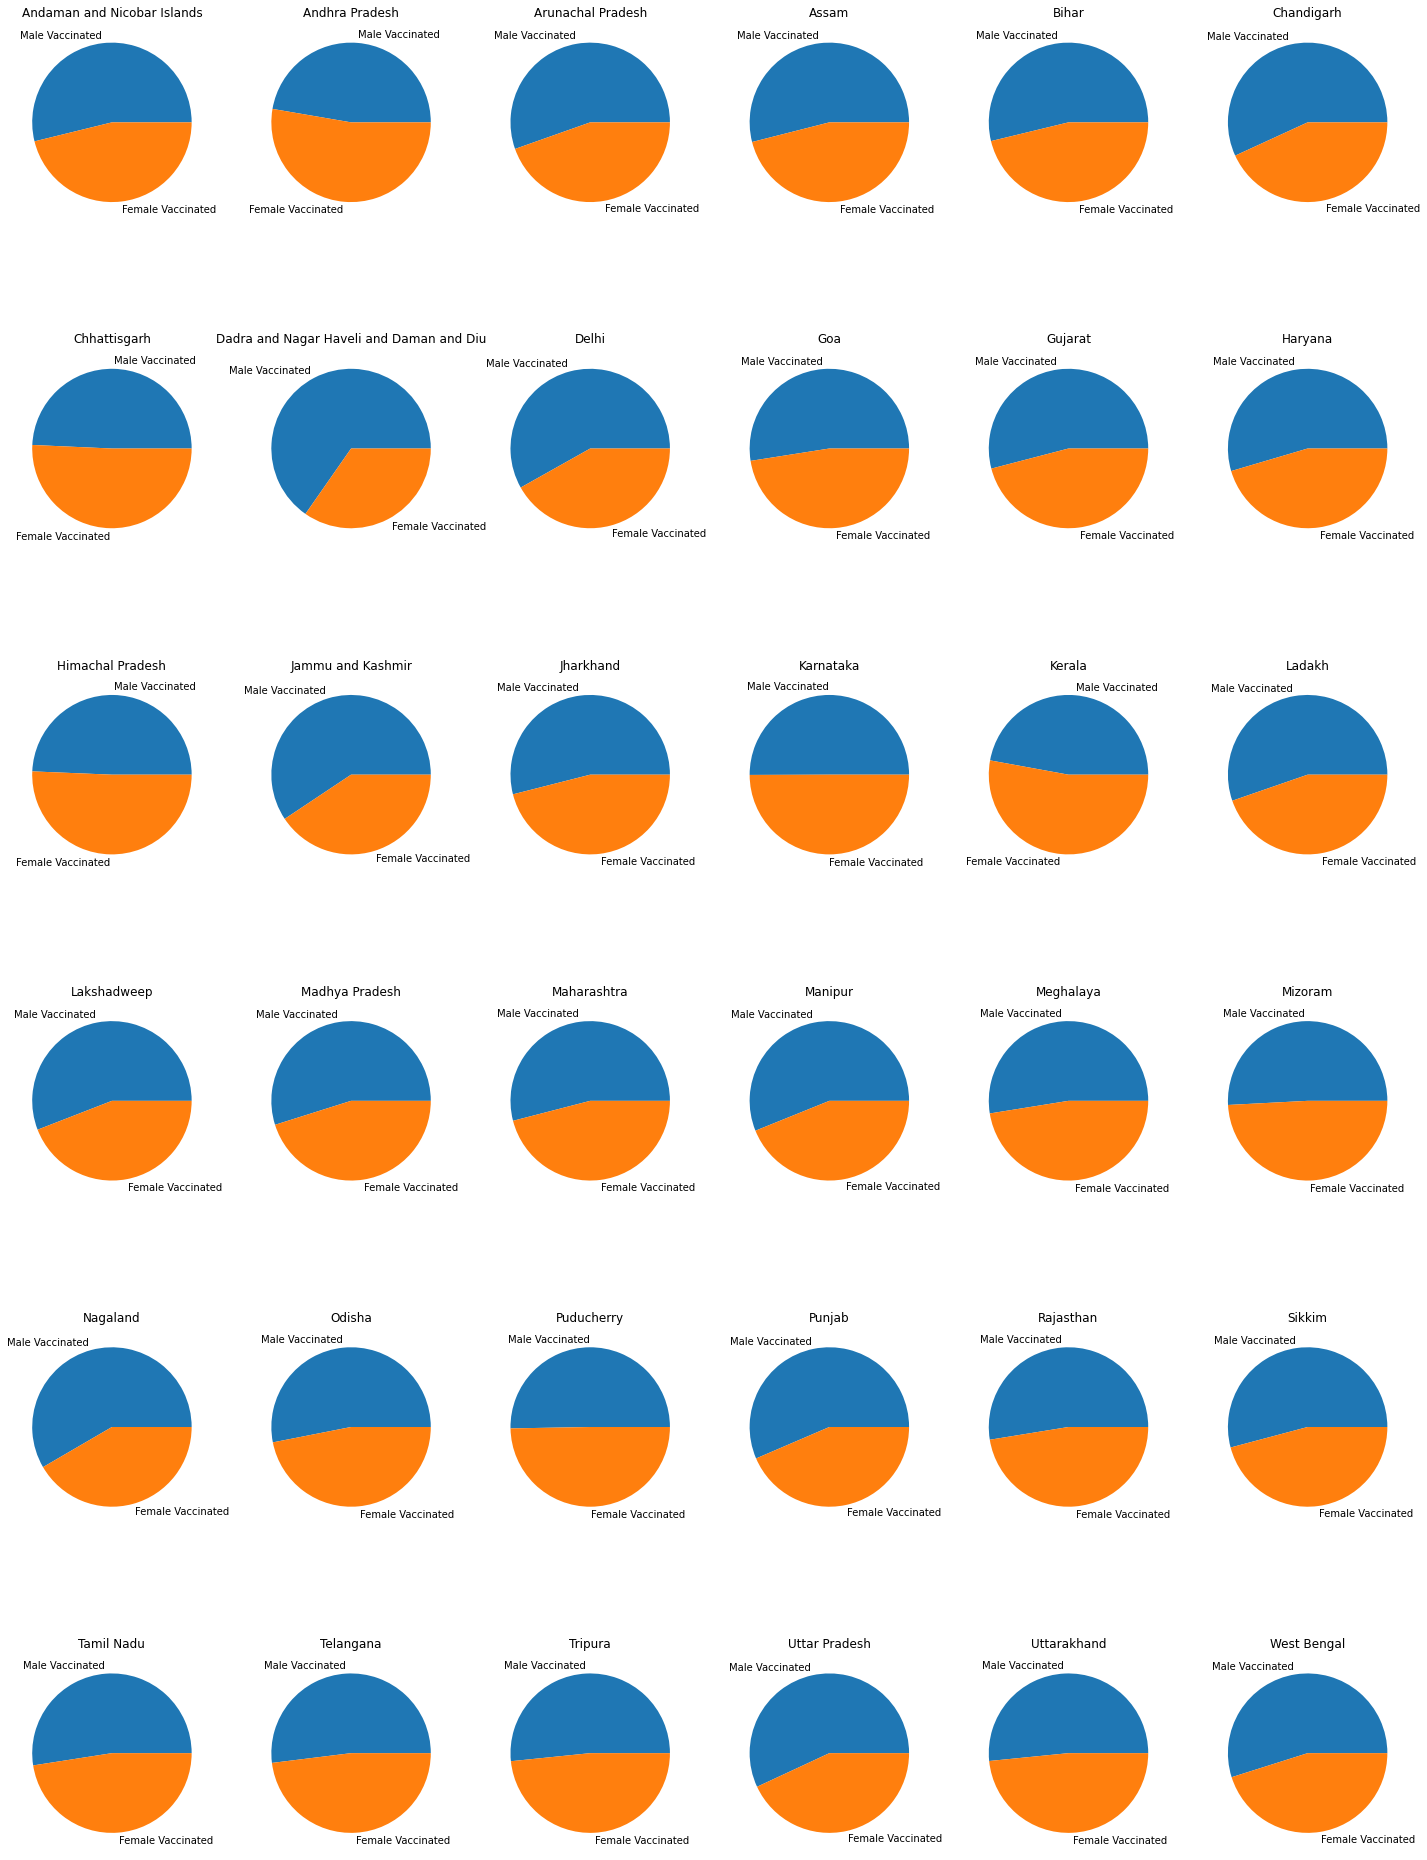

In [40]:
fig, ax = plt.subplots(6, 6, figsize=(25, 35))
a=b=0
for i in range(37):
    if i==13:
        continue
    ax[a,b].pie([v.iloc[i]["Male (Doses Administered)"], v.iloc[i]["Female (Doses Administered)"]], labels=["Male Vaccinated", "Female Vaccinated"])
    ax[a,b].set_title(v.iloc[i]["State"])
    b+=1
    if b==6:
        a+=1
        b=0    

#### Above, I've plotted a pie-chart for each state showing how many males and females have been vaccinated for each of the states. In most of the states, males are vaccinated more than females or are mostly equal.

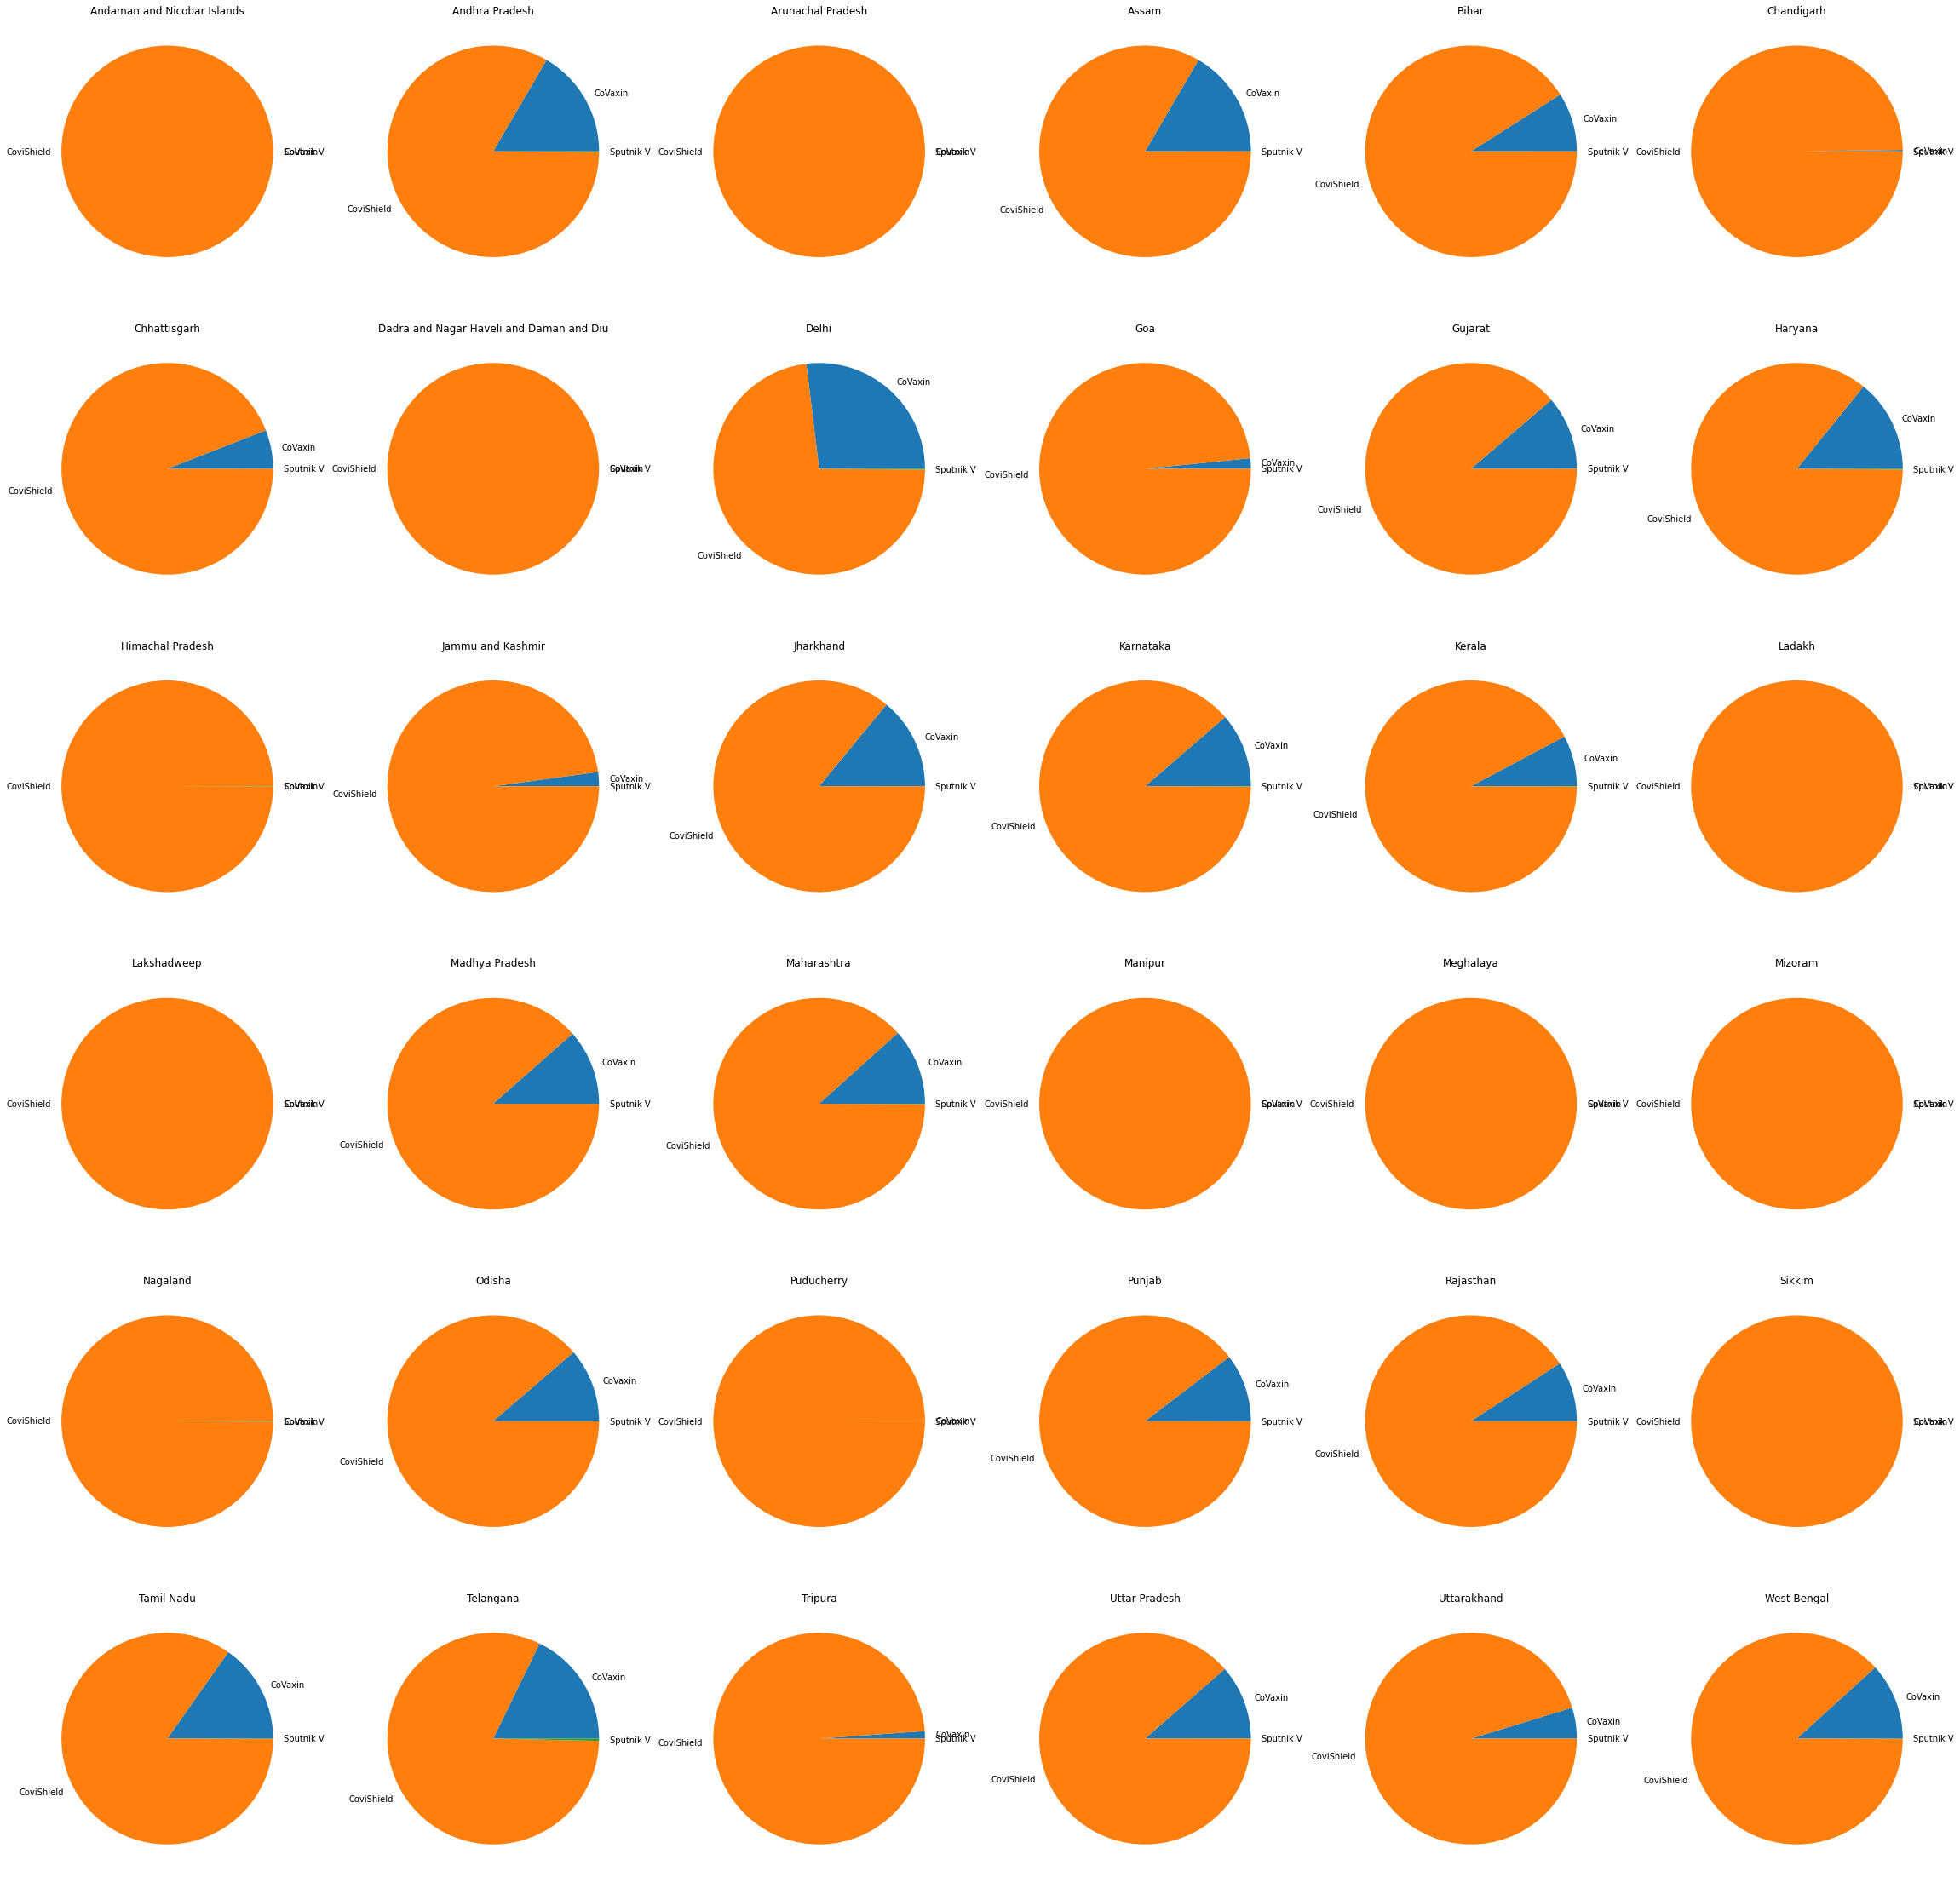

In [41]:
fig, ax = plt.subplots(6, 6, figsize=(40, 40))
a=b=0
for i in range(37):
    if i==13:
        continue
    ax[a,b].pie([v.iloc[i][" Covaxin (Doses Administered)"], v.iloc[i]["CoviShield (Doses Administered)"], v.iloc[i]["Sputnik V (Doses Administered)"]], 
                labels=["CoVaxin","CoviShield", "Sputnik V"])
    ax[a,b].set_title(v.iloc[i]["State"])
    b+=1
    if b==6:
        a+=1
        b=0 

#### India administers 3 kinds of vaccines- Covaxin (Indian one), CoviShield (Astra-Zeneca) and Sputnik V (Russian made). Above, I've plotted what kind of vaccines have each state administered to its people. Turns out Covishield has been the most used by every state followed by covaxin as Sputnik V was developed later on by Russia.

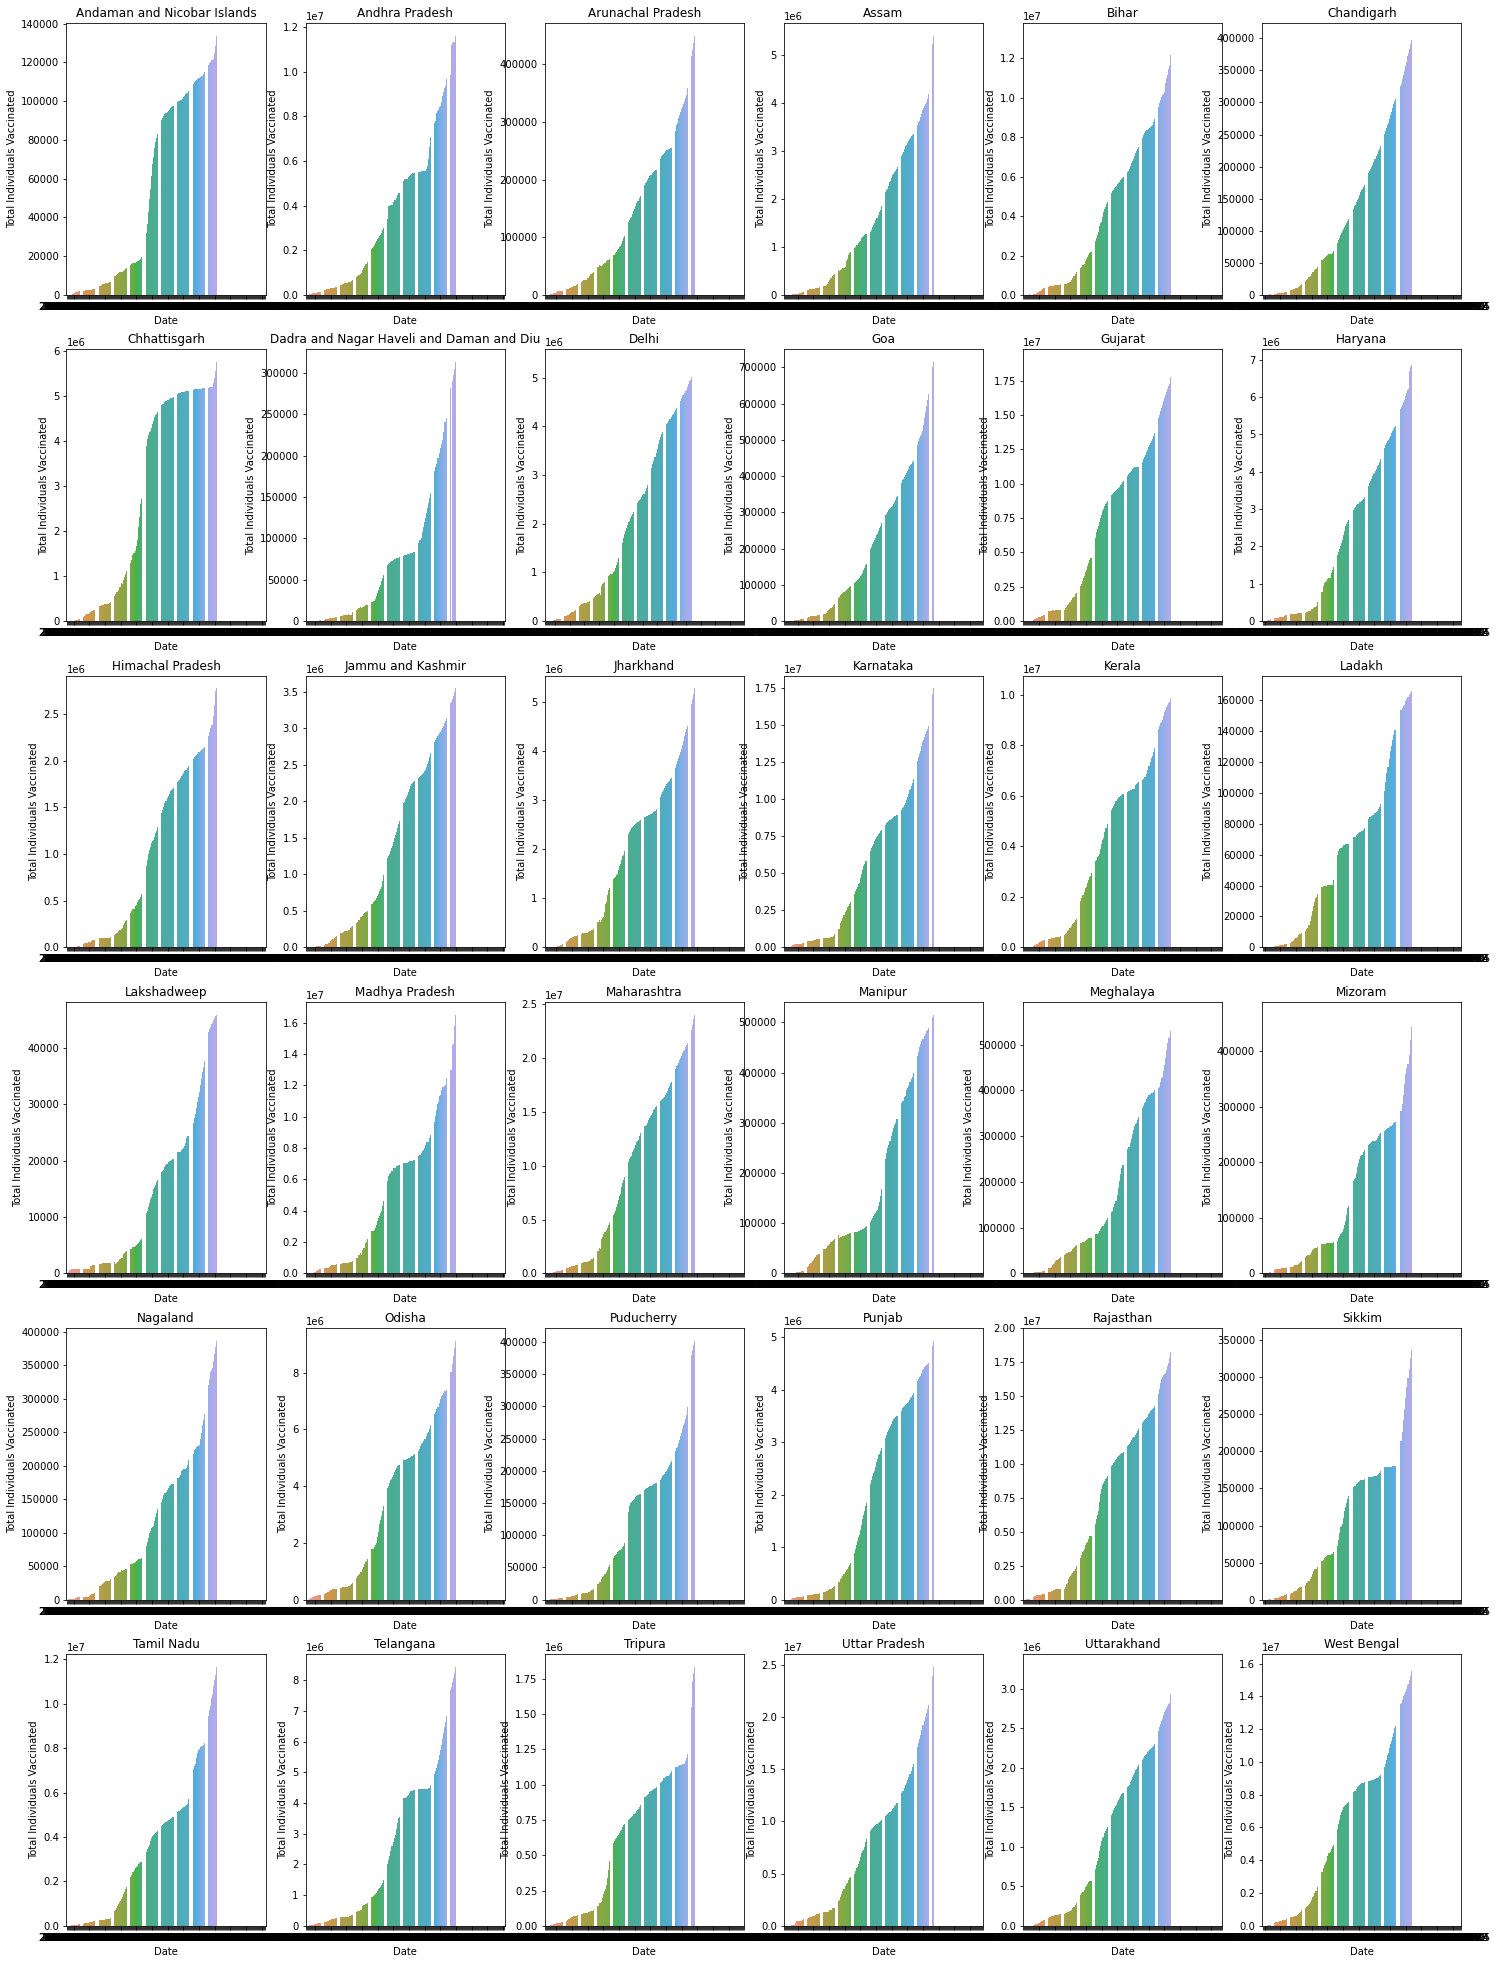

In [42]:
fig, ax = plt.subplots(6, 6, figsize=(25, 35))
a=b=0
f= covid_vaccine.groupby("State")[["Updated On", "Total Individuals Vaccinated"]]
states= list(covid_vaccine["State"].unique())
for state in (states):
    if state=="India":
        continue
    x= f.get_group(state)["Updated On"]
    y= f.get_group(state)["Total Individuals Vaccinated"]
    sns.barplot(x=x , y=y , ax= ax[a,b])
    ax[a,b].set_title(state)
    ax[a,b].set_xlabel('Date')
    ax[a,b].set_ylabel('Total Individuals Vaccinated')
    b+=1
    if b==6:
        a+=1
        b=0

#### Above, I've plotted the total individuals vaccinated over time for each state. It is without any doubt that each state will see a rise in the trend as India has a huge population so it takes time to vaccinate everyone and hence the numbers will only increase for all the states.

In [43]:
#Here is what the fifth dataset looks like. It's on average unemployment rate in India for the last 30 years
unemployed_df = pd.read_csv('india-unemployment-rate.csv')
unemployed_df

Date  Rate   Annual Change    
0   1991-12-31  5.55             NaN NaN
1   1992-12-31  5.61            0.06 NaN
2   1993-12-31  5.72            0.11 NaN
3   1994-12-31  5.75            0.03 NaN
4   1995-12-31  5.75            0.00 NaN
5   1996-12-31  5.75            0.00 NaN
6   1997-12-31  5.74           -0.01 NaN
7   1998-12-31  5.74            0.00 NaN
8   1999-12-31  5.78            0.04 NaN
9   2000-12-31  5.75           -0.03 NaN
10  2001-12-31  5.73           -0.02 NaN
11  2002-12-31  5.77            0.04 NaN
12  2003-12-31  5.77            0.00 NaN
13  2004-12-31  5.72           -0.05 NaN
14  2005-12-31  5.65           -0.07 NaN
15  2006-12-31  5.52           -0.13 NaN
16  2007-12-31  5.41           -0.11 NaN
17  2008-12-31  5.36           -0.05 NaN
18  2009-12-31  5.61            0.25 NaN
19  2010-12-31  5.65            0.04 NaN
20  2011-12-31  5.65            0.00 NaN
21  2012-12-31  5.66            0.01 NaN
22  2013-12-31  5.67            0.01 NaN
23  2014-12-31  5.60           -0.07 NaN
24  2015-12-31  5.56           -0.04 NaN
25  2016-12-31  5.51           -0.05 NaN
26  2017-12-31  5.41           -0.10 NaN
27  2018-12-31  5.33           -0.08 NaN
28  2019-12-31  5.27           -0.06 NaN
29  2020-12-31  7.11            1.84 NaN

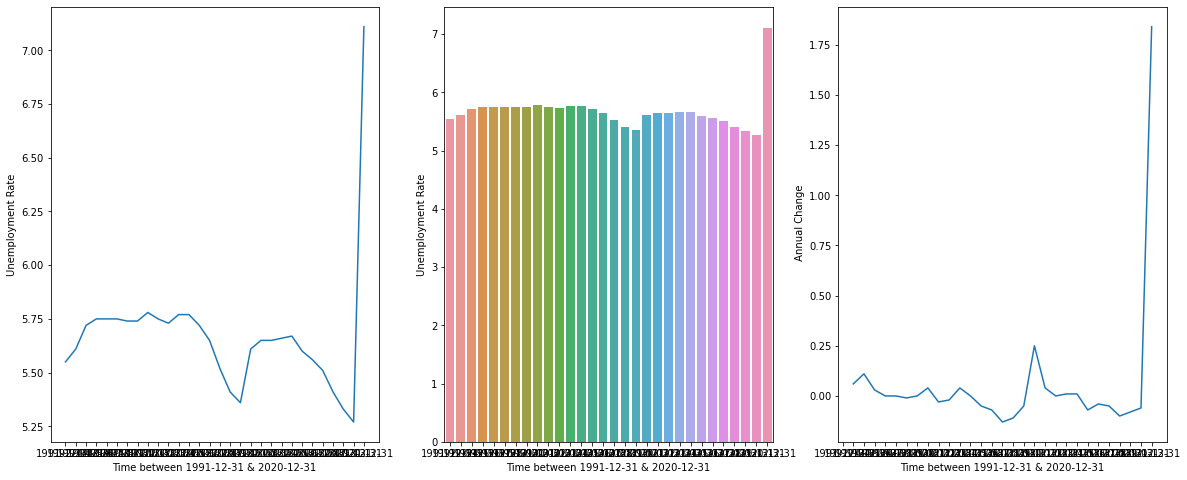

In [44]:
fig, ax= plt.subplots(1,3, figsize=(20,8))
sns.lineplot(x="Date", y="Rate",data=unemployed_df, ax= ax[0])
sns.lineplot(x="Date", y=" Annual Change",data=unemployed_df, ax= ax[2])
sns.barplot(x="Date", y="Rate",data=unemployed_df, ax= ax[1])
ax[0].set(xlabel="Time between 1991-12-31 & 2020-12-31", ylabel="Unemployment Rate")
ax[1].set(xlabel="Time between 1991-12-31 & 2020-12-31", ylabel="Unemployment Rate")
ax[2].set(xlabel="Time between 1991-12-31 & 2020-12-31")
plt.show()

#### Above, in the first 2 diagrams, I've just plotted the data tracing the Unemployment rate over the years. One is a line plot and the other is a bar plot. For the last diagram, I've plotted the annual change in unemployment rate over these 30 years. We see that during the covid period, the rate shot up. It had a huge spike as a lot of the companies had to lay off their workers creating that period of instability.

In [45]:
# Here is our sixth dataset. This has unemployment rate from 2016-2021 but it's been recorded daily rather than yearly.
unemployed_df1 = pd.read_csv('Unemployment.csv')
unemployed_df1

Region        Date Frequency  Value
0     India  2016-01-29         D   7.93
1     India  2016-01-30         D   7.92
2     India  2016-01-31         D   8.00
3     India  2016-02-01         D   7.99
4     India  2016-02-02         D   7.95
...     ...         ...       ...    ...
2048  India  2021-09-10         D   8.06
2049  India  2021-09-11         D   8.00
2050  India  2021-09-12         D   7.94
2051  India  2021-09-13         D   7.90
2052  India  2021-09-14         D   7.84

[2053 rows x 4 columns]

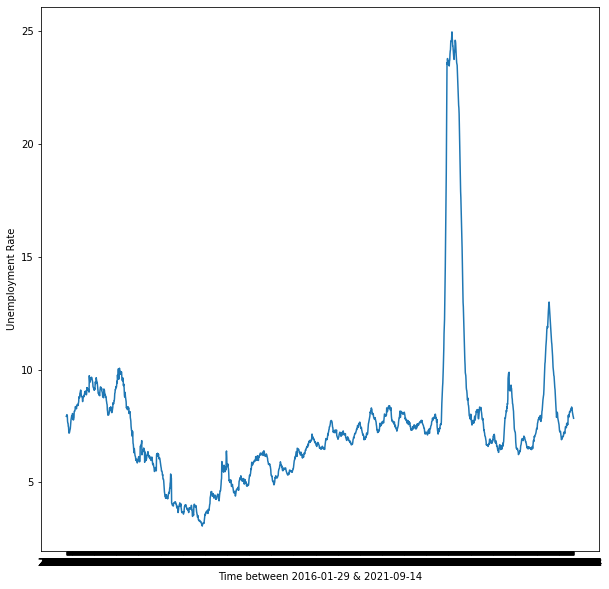

In [46]:
fig, ax= plt.subplots(figsize=(10,10))
sns.lineplot(x="Date", y="Value",data=unemployed_df1, ax=ax)
ax.set(xlabel="Time between 2016-01-29 & 2021-09-14", ylabel="Unemployment Rate")
plt.show()

#### The timeplot above records unemployment rate daily from 2016-01-29 to 2021-09-14. Obviously, during the covid period, the rate shot up but it gradually started to decline and become more stable.

In [47]:
year=[]
for i in range(2053):
    year.append(int(unemployed_df1.iloc[i]['Date'][0:4]))
    
unemployed_df1["Year"]= year    

In [48]:
u= unemployed_df1.groupby("Year")["Value"].mean().reset_index()

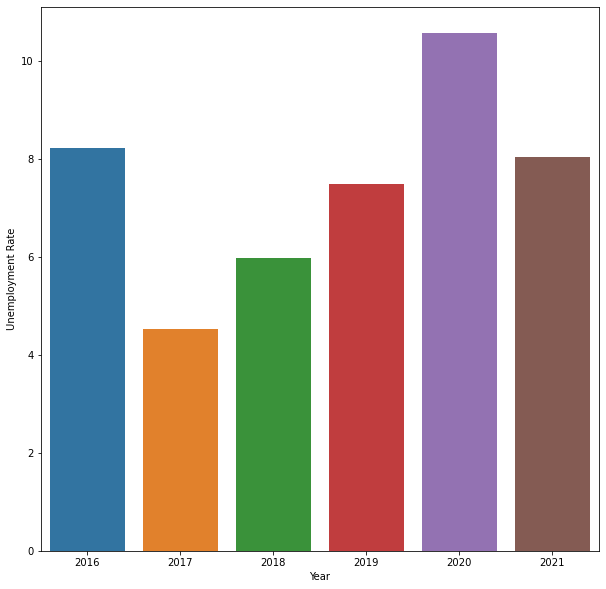

In [49]:
fig, ax= plt.subplots(figsize=(10,10))
sns.barplot(x= u["Year"], y= u["Value"], ax=ax)
ax.set(ylabel="Unemployment Rate")
plt.show()

#### I extracted only the years and their corresponding rate and calculated the mean rate for those respective years. I then plot them using a barplot

# References

This research obviously is not the best since a lot of other factors played a role in the rising cases which need to be controlled for. I definitely did not know all the codes that I used for my analysis. However, to be fair and to give credit where it's due, I'd like to tell my source of data and the codes.

### Datasets
1. I got 3 of my datasets ("StatewiseTestingDetails.csv", "covid_19_india.csv", "covid_vaccine_statewise.csv") from Kaggle (https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=StatewiseTestingDetails.csv) and ("data.csv") from Kaggle too (https://www.kaggle.com/samacker77k/covid19india)
2. I got the ("india-unemployment-rate.csv") from (https://www.macrotrends.net/countries/IND/india/unemployment-rate) and ("Unemployment.cs") from (https://www.kaggle.com/ysthehurricane/impact-of-covid19-on-unemployment-rate-in-india?select=Unemployment_Rate_-_Trailing_30_days_D_Total.txt) [The second dataset]
3. In order to be able to plot the Indian map, I required a shape file containing the states and their coordinates. I got all the files from (https://www.kaggle.com/dhruvanurag20/final-shp)

### SourceCodes
1. (https://www.kaggle.com/nehaprabhavalkar/how-to-plot-map-of-india-using-python/notebook)- I referred to this link to plot the Indian map and the kinds of cases in different states
2. We obviously did not learn the kinds of visualizations we have done. So I googled the kinds of visualizations we can do with Python and came up with these links. I would choose the visualization that would fit the data best and if I didn't know how to produce it, I would select it and look at the codes.
- https://plotly.com/python/plotly-express/ 
- https://seaborn.pydata.org/examples/index.html
3. I used Google to identify and correct the errors I encountered and went through a project to get an idea of what all visualizations I can produce as this is my first time doing a visualization project.
4. I had seen the WordCloud visualization when I was in 1st year so it struck me and I googled as to how it can be done and implemented.
5. I had talked to the professor who suggested I do statewise comparisons and show the Indian Map. Hence, that gave me an idea of doing visualization for each state on certain topics like vaccine administration, male-female ration for vaccines, total individuals vaccinated, kinds of vaccines, etc and I also showed the Indian Map with different visualization.